<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/A_Digital_Thread_FunmiSomoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

In [ ]:
# Read all data files (ditching the os method since there are just 6 files in total)
data_v = pd.read_csv('volcanos.csv', sep=',')
data_s = pd.read_csv('sensors.csv', sep=',')
data_n = pd.read_csv('nodes.csv', sep=',')
data_dp = pd.read_csv('datapoints.csv', sep=',')
data_dt = pd.read_csv('datatypes.csv', sep=',')

In [ ]:
# Check dataframe sizes
print("data_v shape is ", data_v.shape)
print("data_s shape is ", data_s.shape)
print("data_n shape is ", data_n.shape)
print("data_dt shape is ", data_dt.shape)
print("data_dp shape is ", data_dp.shape)

data_v shape is  (1, 7)
data_s shape is  (61, 8)
data_n shape is  (11, 8)
data_dt shape is  (7, 4)
data_dp shape is  (176534, 4)


Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [ ]:
# see info about data_v
data_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
id             1 non-null object
name           1 non-null object
description    1 non-null object
location       1 non-null object
status         1 non-null object
created_at     1 non-null object
updated_at     1 non-null object
dtypes: object(7)
memory usage: 136.0+ bytes


In [ ]:
# see info about data_s
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
id                61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null object
updated_at        61 non-null object
data_type_id      61 non-null object
node_id           61 non-null object
dtypes: int64(1), object(7)
memory usage: 3.9+ KB


In [ ]:
# see info about data_n
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
id             11 non-null object
name           11 non-null object
description    11 non-null object
location       11 non-null object
status         11 non-null object
created_at     11 non-null object
updated_at     11 non-null object
volcano_id     11 non-null object
dtypes: object(8)
memory usage: 784.0+ bytes


In [ ]:
# see info about data_dt
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
id         7 non-null object
type       7 non-null object
si_unit    7 non-null object
type_id    7 non-null object
dtypes: object(4)
memory usage: 304.0+ bytes


In [ ]:
# see info about data_dp
data_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176534 entries, 0 to 176533
Data columns (total 4 columns):
id           176534 non-null object
value        63456 non-null float64
timestamp    176534 non-null object
sensor_id    176534 non-null object
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


From the above, there are certainly missing readings in the sensor values

In [ ]:
# change all date datatypes to pandas datetime
data_v[['created_at', 'updated_at']] = data_v[['created_at', 'updated_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
data_n[['created_at', 'updated_at']] = data_n[['created_at', 'updated_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
data_s[['created_at', 'updated_at']] = data_s[['created_at', 'updated_at']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
data_dp['timestamp'] =  pd.to_datetime(data_dp['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
#data_dir = 'data/Volcano'

In [ ]:
#_files = os.listdir(data_dir)

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**


In [ ]:
# investigate datapoints dataframe
data_dp.head()

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25,763701a1-8679-11e6-a353-2f6c041e2491


In [ ]:
# check number of sensors in dataframe
data_dp['sensor_id'].nunique()

61

In [ ]:
# check for null values
data_dp.isnull().sum(axis=0) 

id                0
value        113078
timestamp         0
sensor_id         0
dtype: int64

In [ ]:
# investigate sensors by conducting a basic statistical summary
data_dp.groupby(['sensor_id'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
sensor_id,,,,,,,,
1248ff60-e707-11e6-89c8-314aa4f67f8c,8816.0,2.619409e+02,1.545058e+02,67.000,125.00000,225.0000,3.760000e+02,1.170000e+03
7635c920-8679-11e6-a353-2f6c041e2491,935.0,9.775080e+01,1.236030e+00,96.000,96.00000,98.0000,9.900000e+01,1.000000e+02
7635f030-8679-11e6-a353-2f6c041e2491,4831.0,8.219644e+01,8.971274e+00,58.000,75.00000,83.0000,8.900000e+01,9.600000e+01
7636da90-8679-11e6-a353-2f6c041e2491,1009.0,3.830811e+02,5.617298e+02,0.810,25.05000,50.0300,6.048530e+02,2.744429e+03
763701a0-8679-11e6-a353-2f6c041e2491,1007.0,1.489916e+01,1.084564e+02,0.120,0.15400,0.1840,2.830000e-01,9.726700e+02
763701a1-8679-11e6-a353-2f6c041e2491,12.0,2.093758e+02,2.066182e+02,13.432,13.51850,186.3460,3.844393e+02,4.597360e+02
763b9580-8679-11e6-a353-2f6c041e2491,914.0,9.540853e-01,2.031073e+00,0.136,0.28250,0.5100,1.227750e+00,3.319800e+01
763bbc90-8679-11e6-a353-2f6c041e2491,1025.0,-9.727926e+01,7.864307e+01,-152.970,-144.58000,-144.5800,2.174000e+01,1.759300e+02
763ca6f0-8679-11e6-a353-2f6c041e2491,926.0,-5.314847e+01,8.363696e+01,-142.120,-142.12000,21.0250,2.490750e+01,3.282000e+01


The above shows that there are a total of 61 unique sensors

###### Store each sensor readings in a separate file.

In [ ]:
# iterate in a groupby object and output all files
for (sensor_id), group in data_dp.groupby(['sensor_id']):
    group.to_csv(f'{sensor_id}.csv', index=False)

In [ ]:
#another code to do 'almost' same thing
#function for subsetting by sensor
#myList = [] 
#for id, df_id in data_dp.groupby('sensor_id'):
 #   print(df_id) #for testing
   # myList.append(df_id)

In [ ]:
#myList[2] #test; access dataframe of the third sensor

In [ ]:
######## This also worked but I found it difficult to later access dataframes.
#sensor_names = data_dp.sensor_id.unique()
#sensor_dict = {elem : pd.DataFrame() for elem in sensor_names}

#for key in sensor_dict.keys():
 #   sensor_dict[key] = data_dp[:][data_dp.sensor_id == key]

In [ ]:
#for i, g in sensors.groupby('sensor_id'):
 #   globals()['df_' + str(i)] =  g
  #  print(g)

###### Visualisations

In [ ]:
data_dp.head(1)

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491


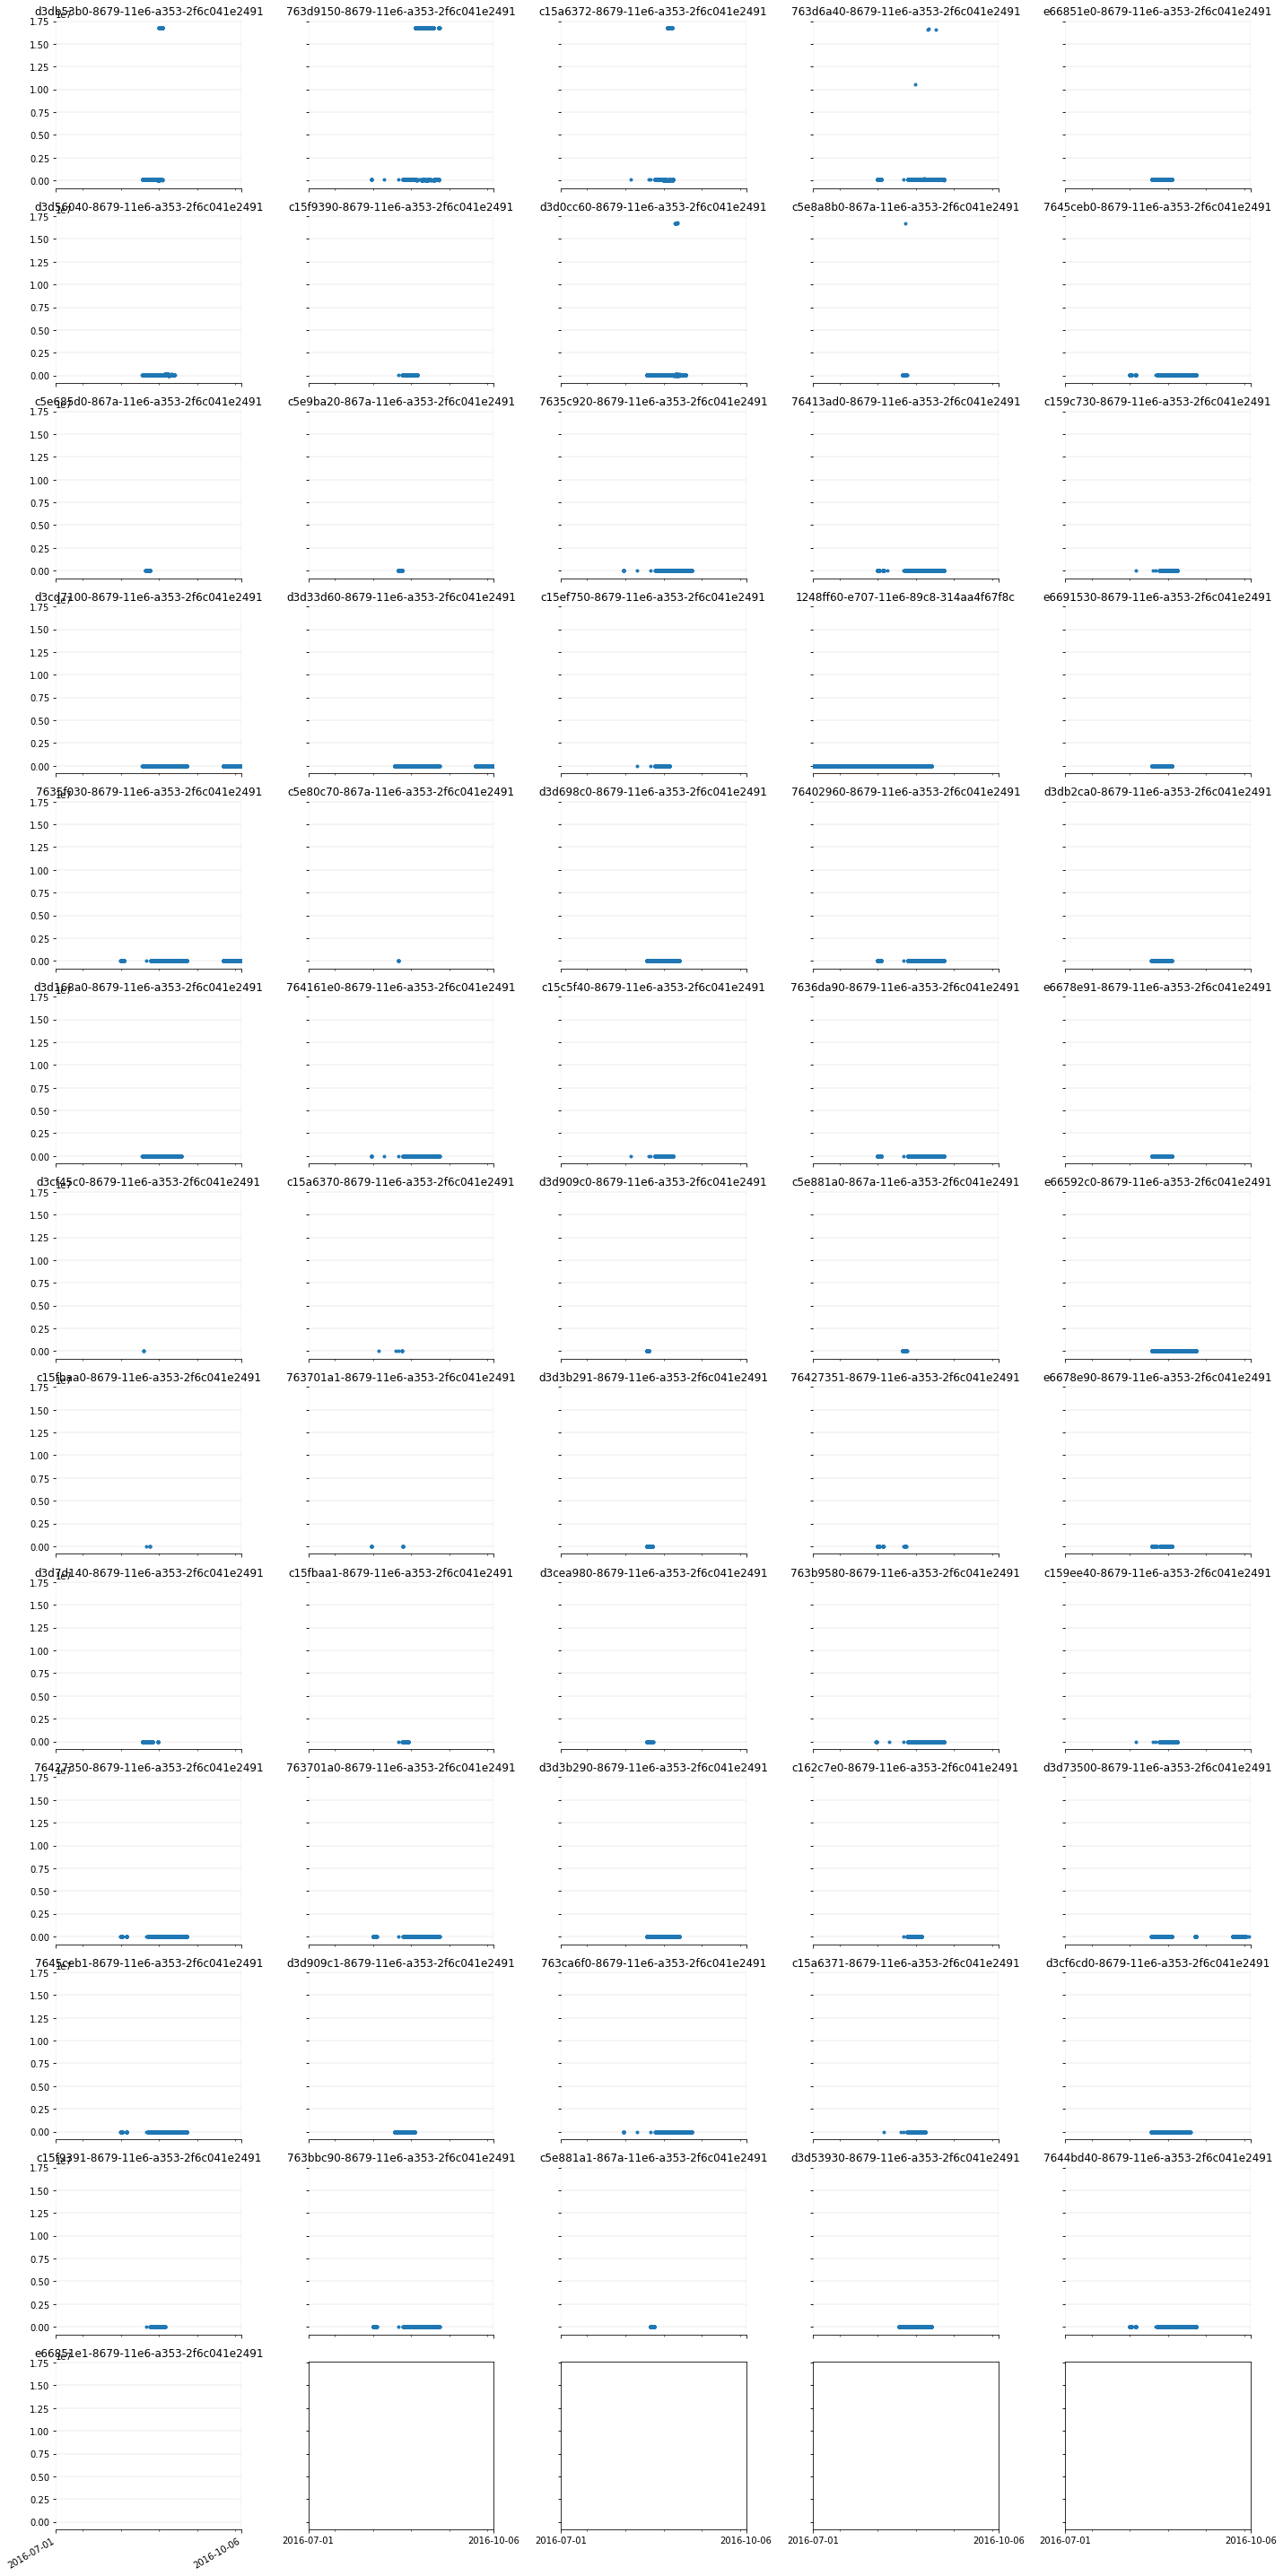

In [ ]:
#Plot with shared yaxis

# Ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=13, ncols=5, sharex=True, sharey=True)
fig.set_size_inches(20,40) 

axes_list = [item for sublist in axes for item in sublist] 

grouped = data_dp.groupby('sensor_id')
ordered_sensor_names = grouped['value'].last().sort_values(ascending=False).index

# Instead of looping through the groupby
# CREATE the groupby
# LOOP through the ordered names
# and use .get_group to get the right group

first_year = data_dp['timestamp'].min()
last_year = data_dp['timestamp'].max()

for sensor in ordered_sensor_names:
    selection = grouped.get_group(sensor)
    
    ax = axes_list.pop(0)
    selection.plot(x='timestamp', y='value', label=sensor, ax=ax, legend=False, marker='.', linestyle='None')
    ax.set_title(sensor)
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# delete any ax not used
#for ax in axes_list:
    #ax.remove()

plt.subplots_adjust(hspace=1)

plt.tight_layout()

The above visualisation shows that the magnitude of readings from most sensors are quite similar, excluding sensors 1, 2, 3, 4, 8, & 9

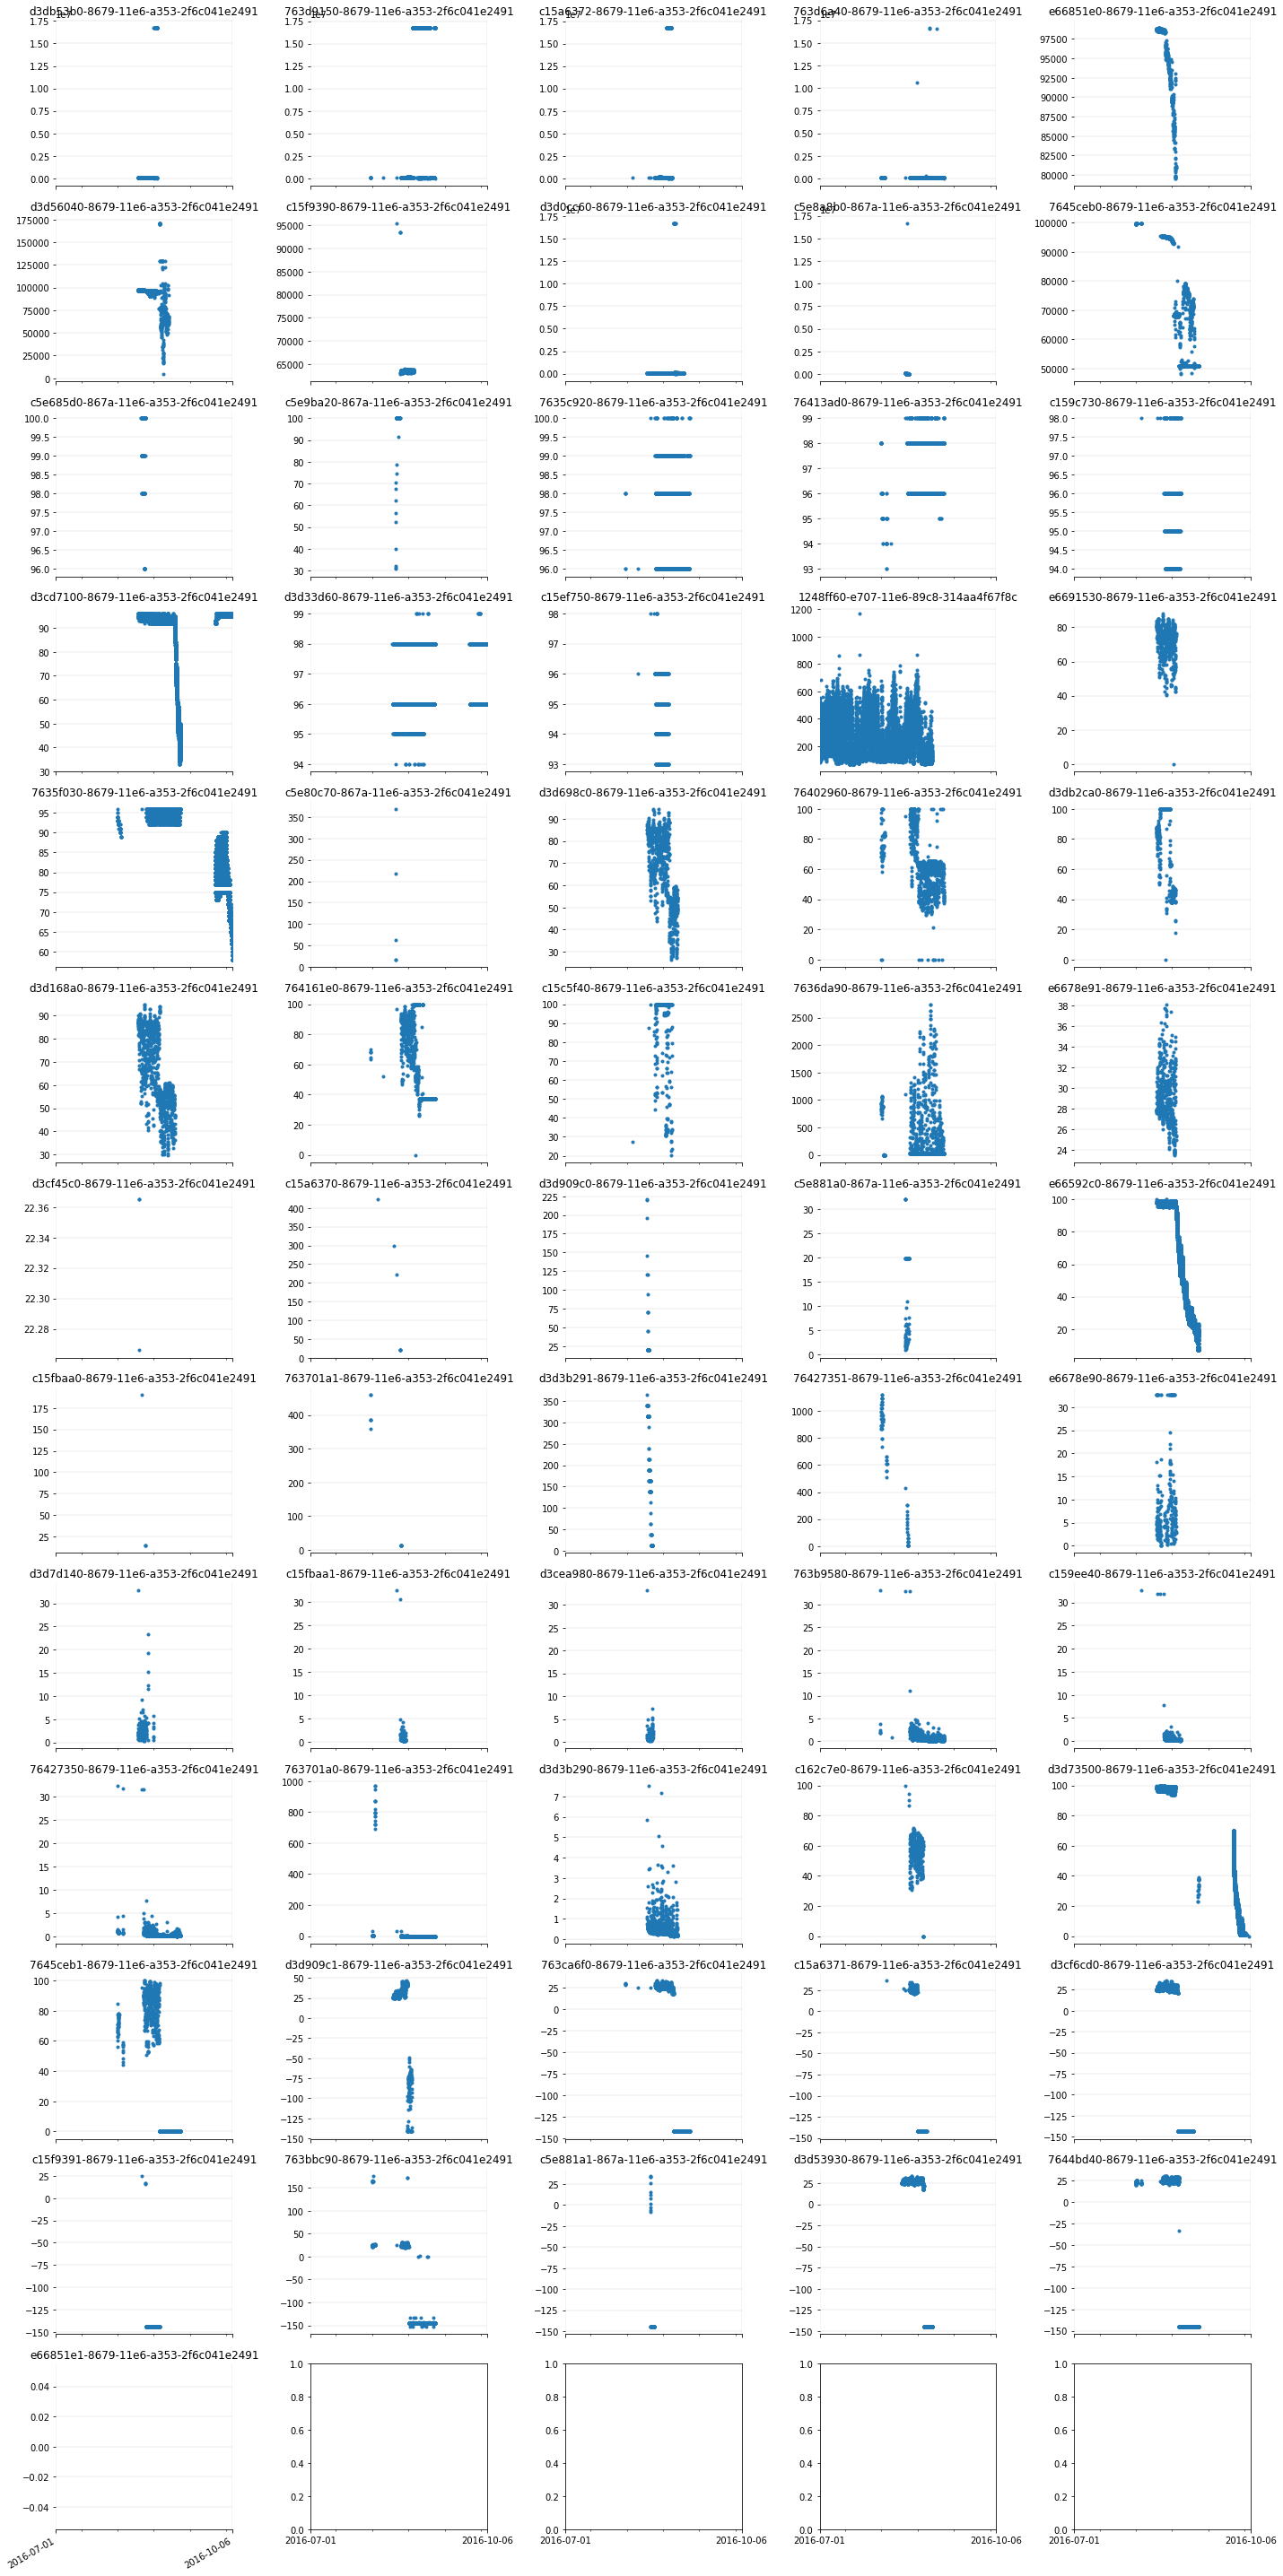

In [ ]:
# Plot with individual yaxis

# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=13, ncols=5, sharex=True)
fig.set_size_inches(20,40) 

axes_list = [item for sublist in axes for item in sublist] 

grouped = data_dp.groupby('sensor_id')
ordered_sensor_names = grouped['value'].last().sort_values(ascending=False).index

# Instead of looping through the groupby
# CREATE the groupby
# LOOP through the ordered names
# and use .get_group to get the right group

first_year = data_dp['timestamp'].min()
last_year = data_dp['timestamp'].max()

for sensor in ordered_sensor_names:
    selection = grouped.get_group(sensor)
    
    ax = axes_list.pop(0)
    selection.plot(x='timestamp', y='value', label=sensor, ax=ax, legend=False, marker='.', linestyle='None')
    ax.set_title(sensor)
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# delete any ax not used
#for ax in axes_list:
    #ax.remove()

plt.subplots_adjust(hspace=1)

plt.tight_layout()

From the above, most the sensors were active beginning from around August-September.
Some sensors seems to have had external influences that affected their readings, as they have high and low reading during a period e.g. The 1st, 2nd, and 3rd sensors above.
A particular sensor seems to have picked up more readings than the others

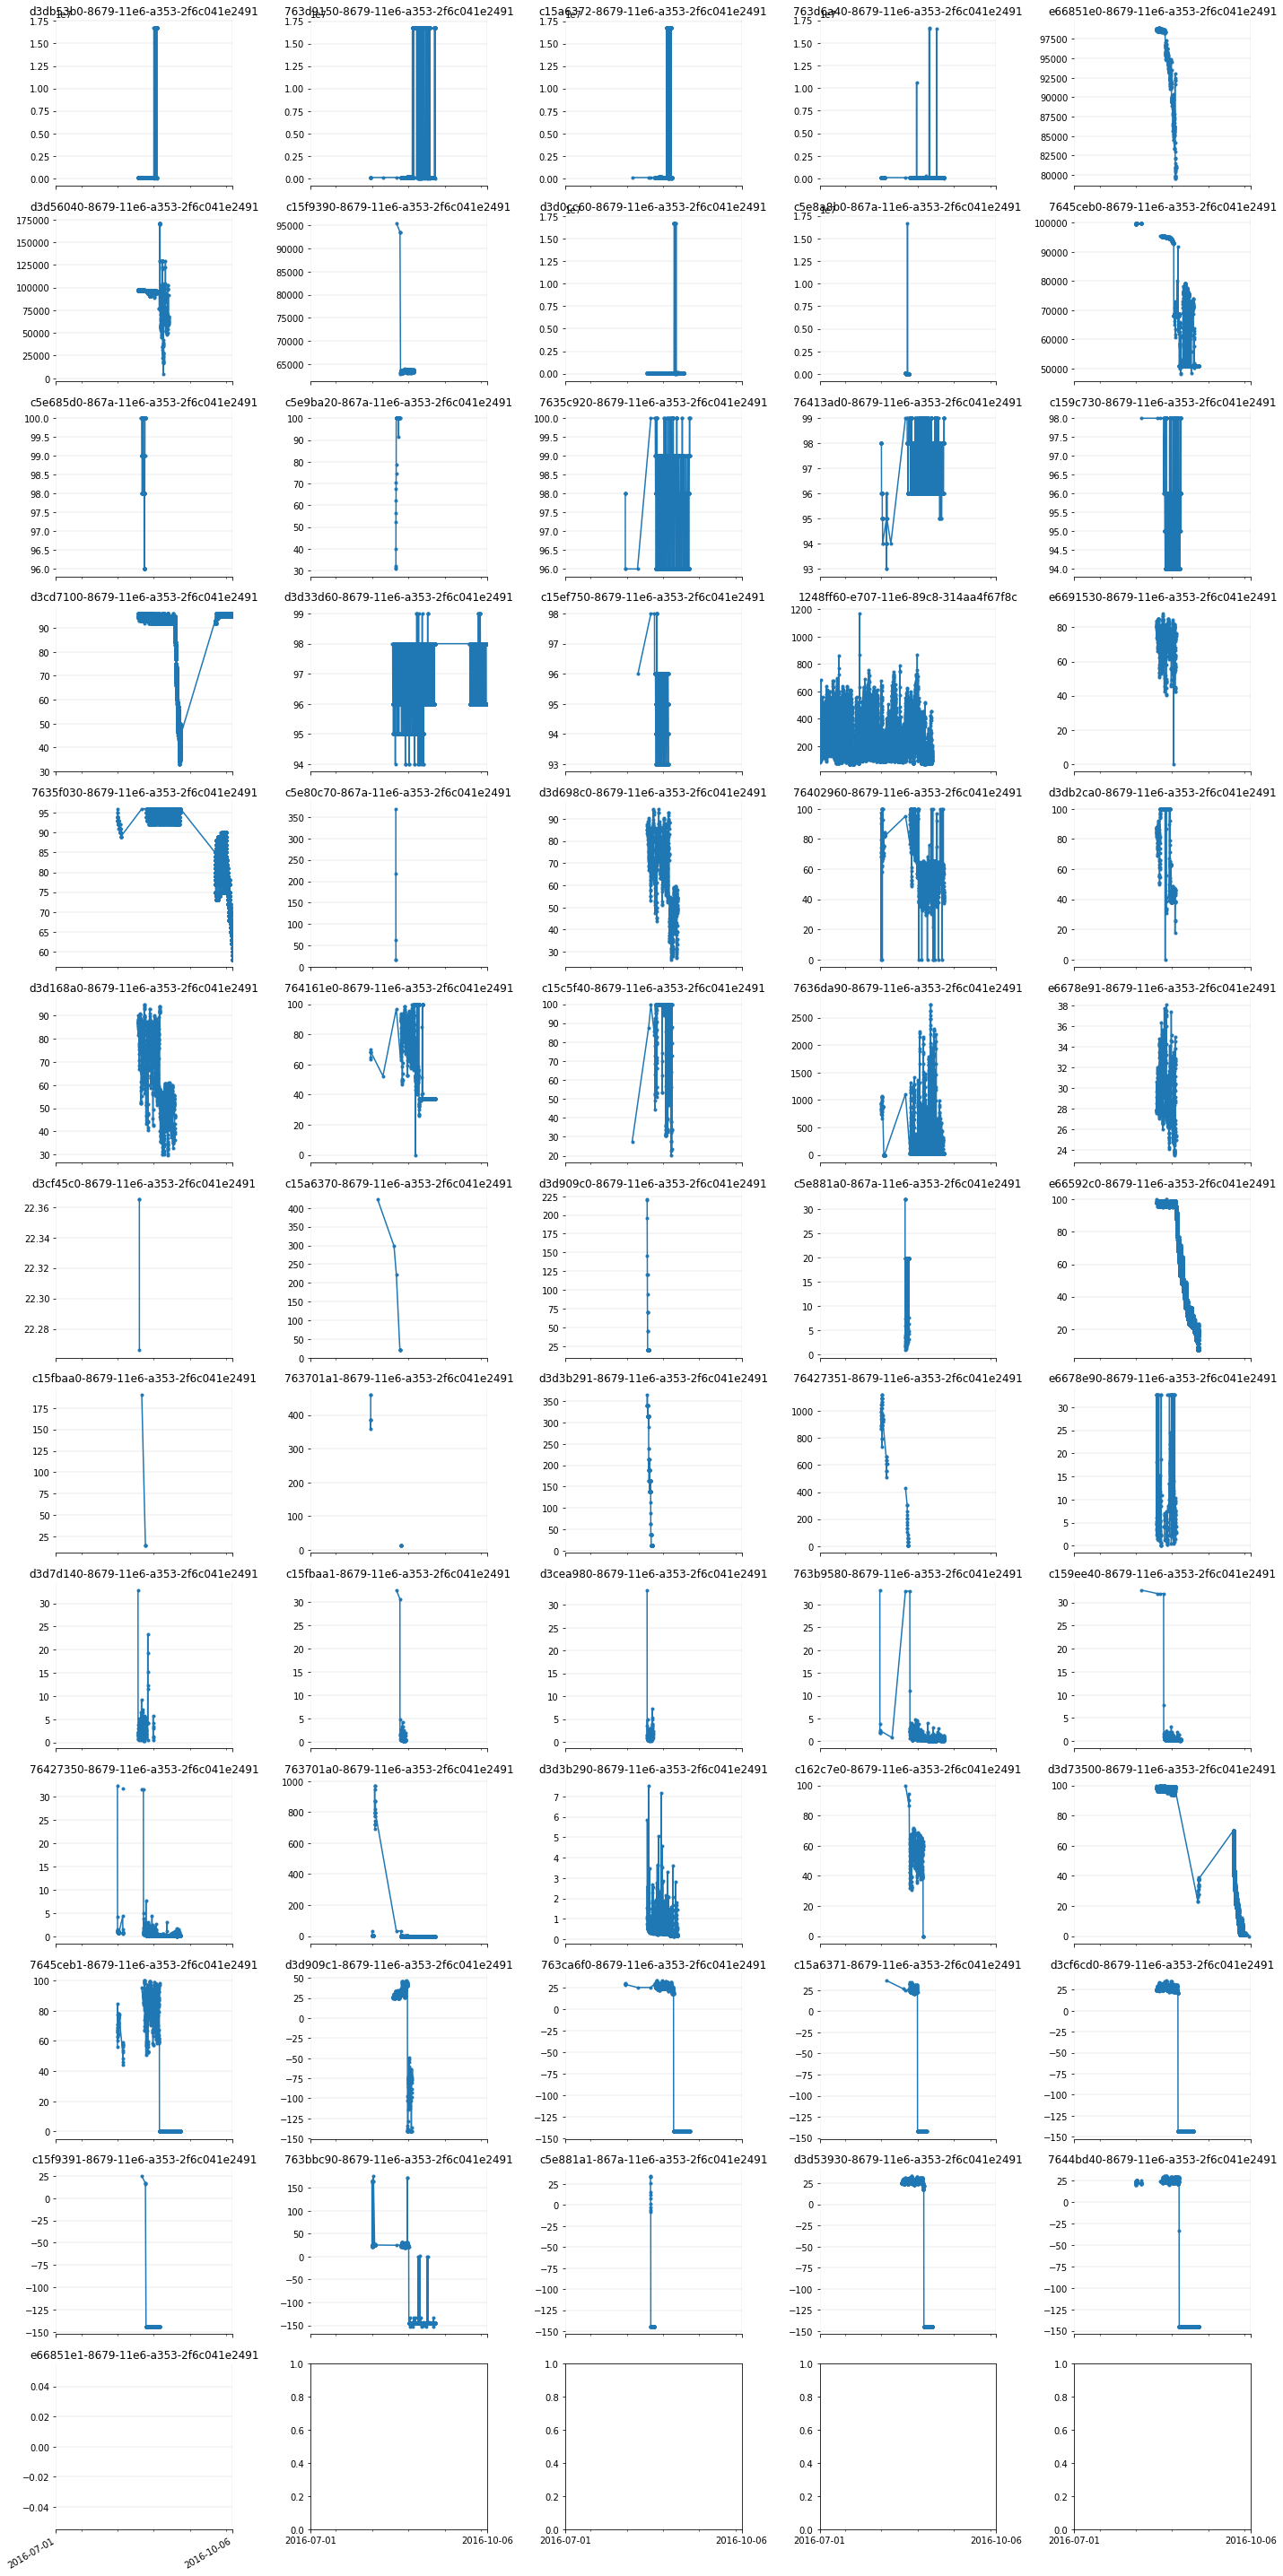

In [ ]:
# Plot with individual yaxis

# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=13, ncols=5, sharex=True)
fig.set_size_inches(20,40) 

axes_list = [item for sublist in axes for item in sublist] 

grouped = data_dp.groupby('sensor_id')
ordered_sensor_names = grouped['value'].last().sort_values(ascending=False).index

# Instead of looping through the groupby
# CREATE the groupby
# LOOP through the ordered names
# and use .get_group to get the right group

first_year = data_dp['timestamp'].min()
last_year = data_dp['timestamp'].max()

for sensor in ordered_sensor_names:
    selection = grouped.get_group(sensor)
    
    ax = axes_list.pop(0)
    selection.plot(x='timestamp', y='value', label=sensor, ax=ax, legend=False, marker='.')
    ax.set_title(sensor)
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# delete any ax not used
#for ax in axes_list:
    #ax.remove()

plt.subplots_adjust(hspace=1)

plt.tight_layout()

The above shows that there is no particular trend to the data of most sensors.

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000116FCCE18> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

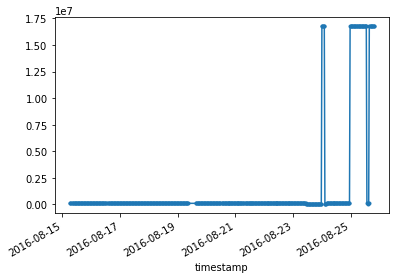

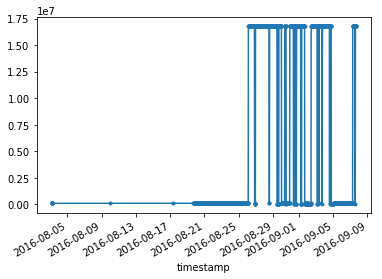

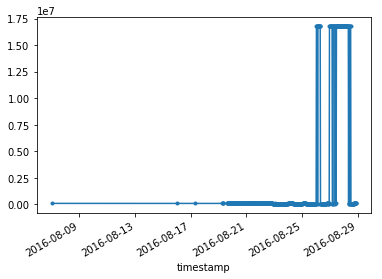

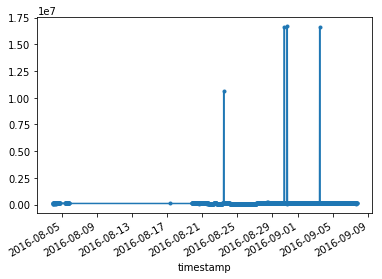

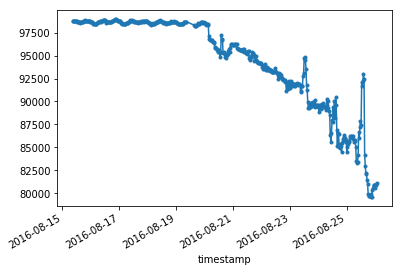

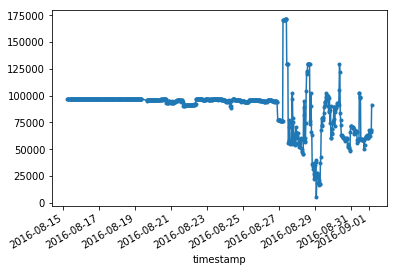

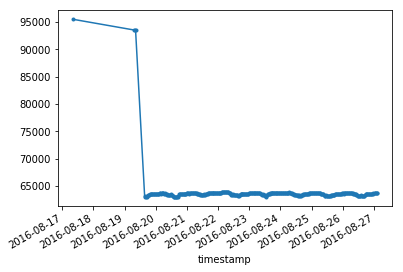

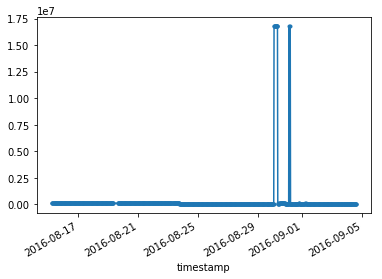

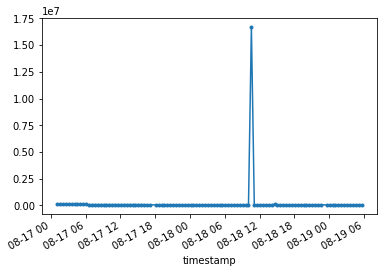

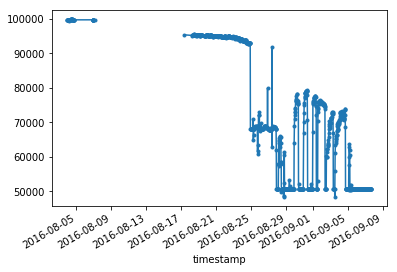

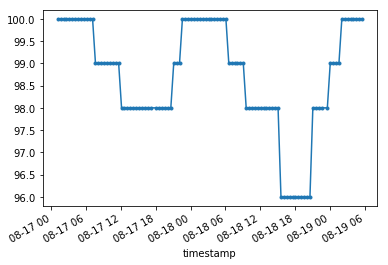

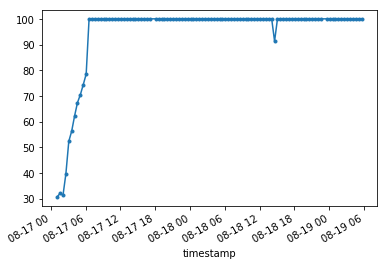

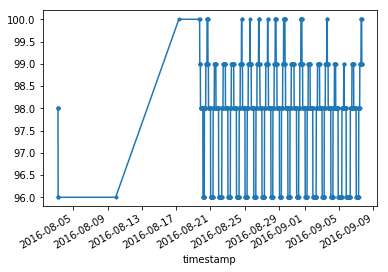

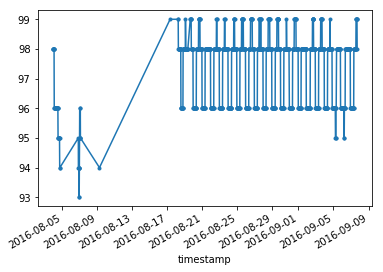

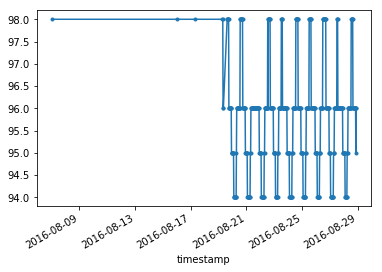

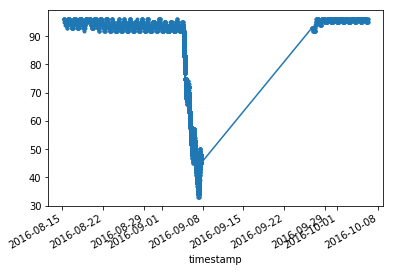

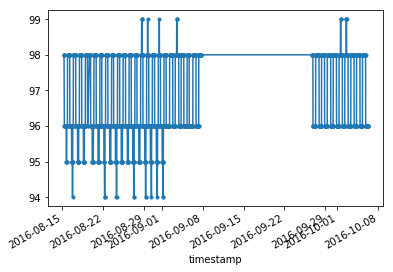

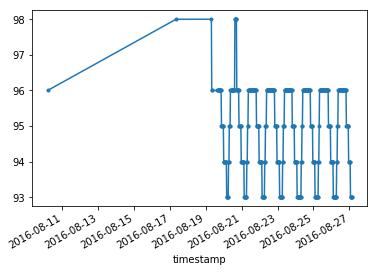

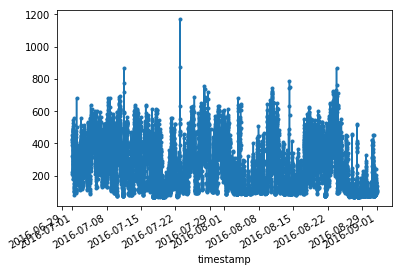

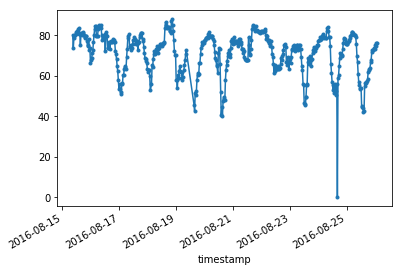

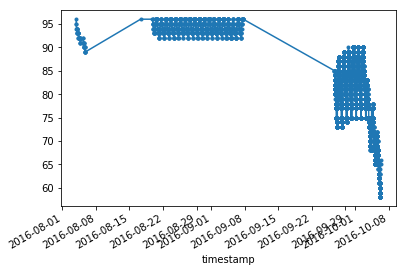

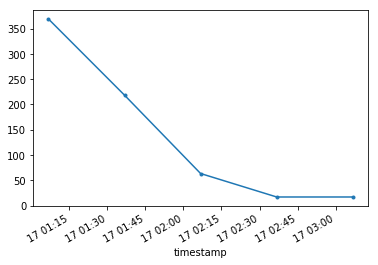

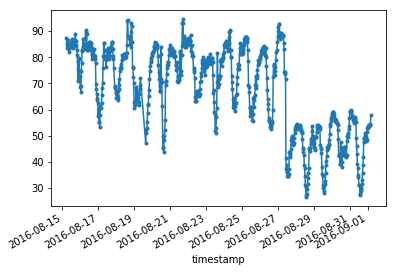

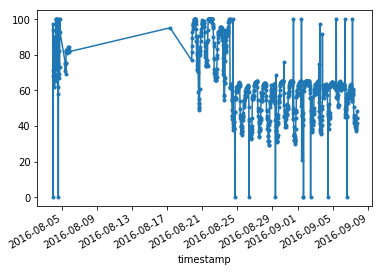

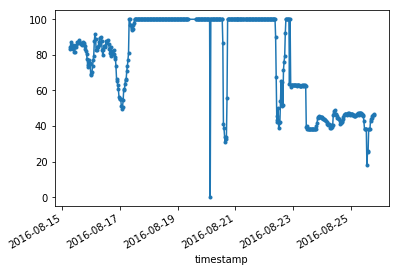

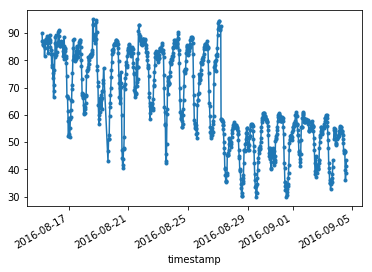

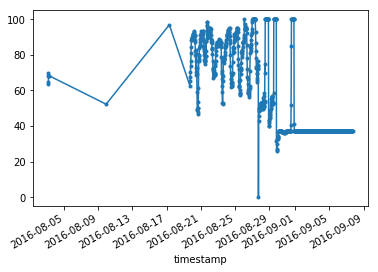

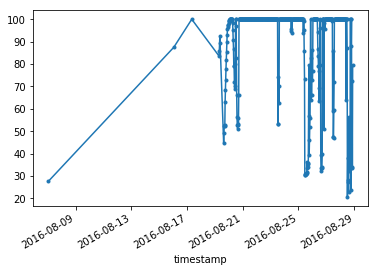

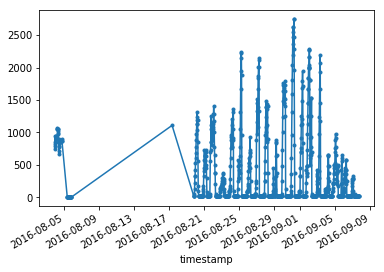

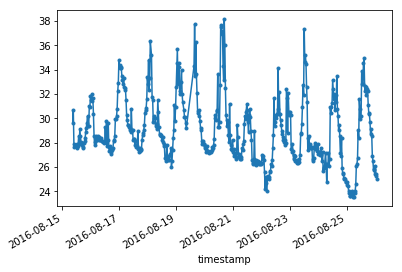

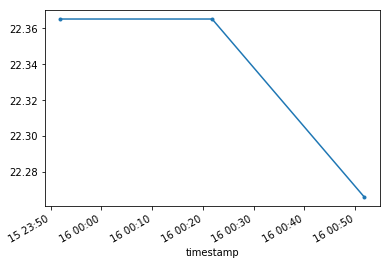

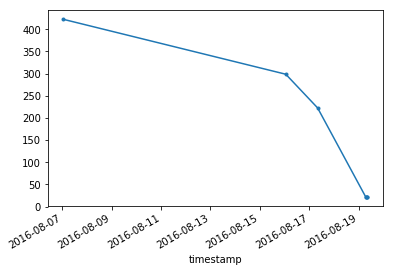

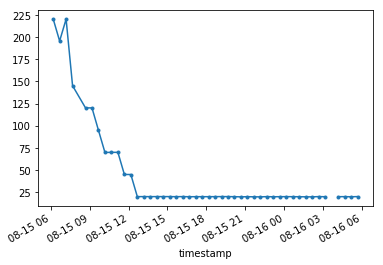

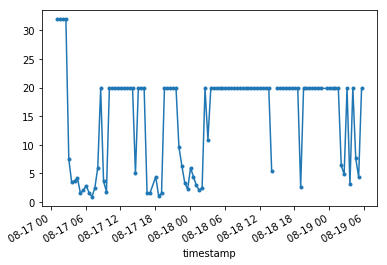

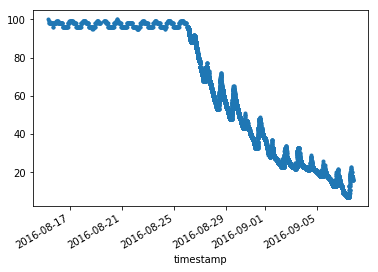

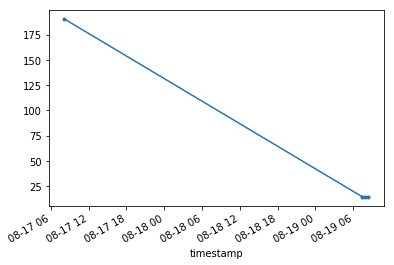

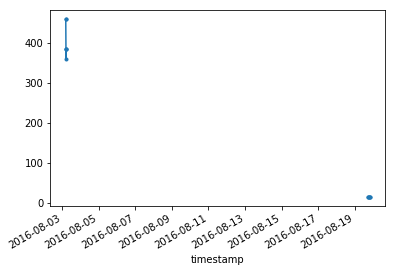

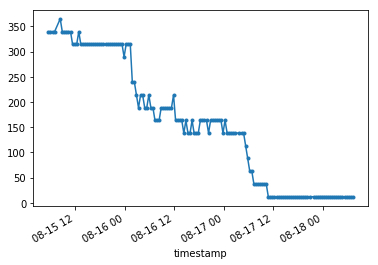

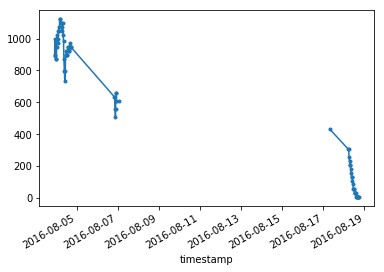

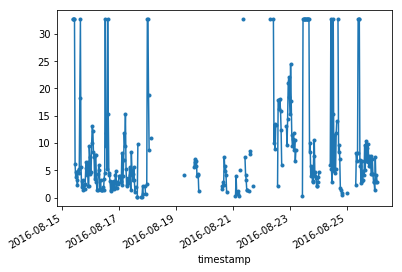

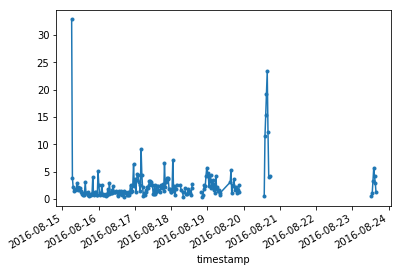

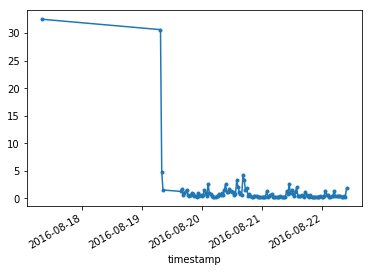

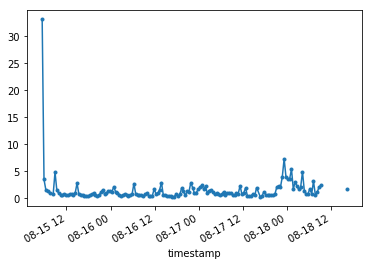

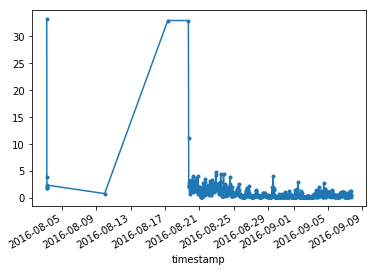

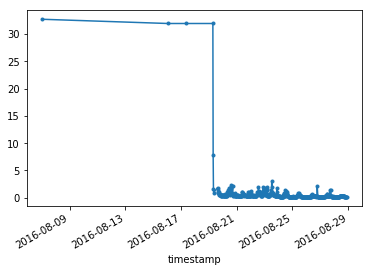

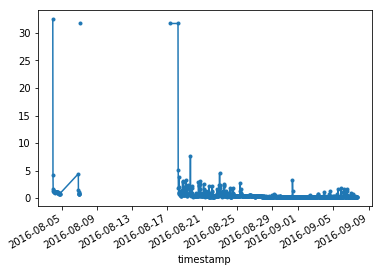

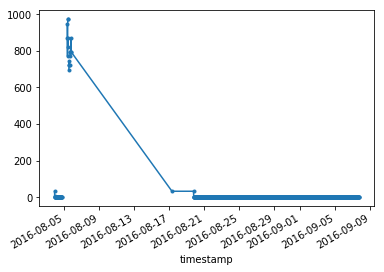

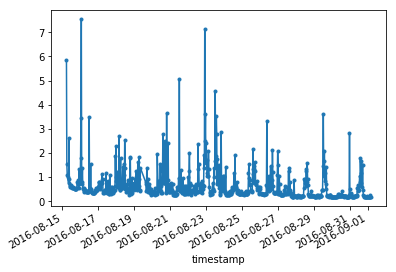

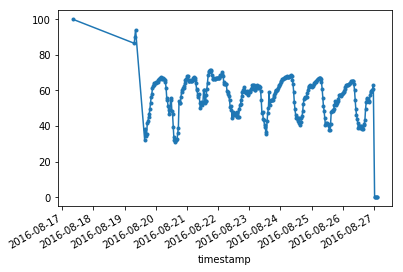

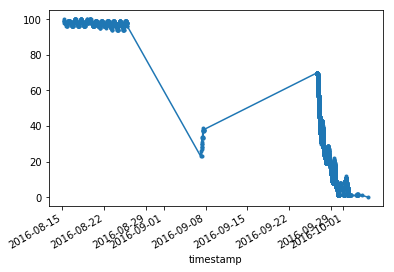

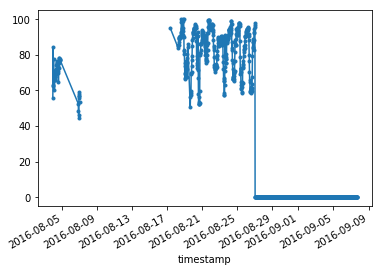

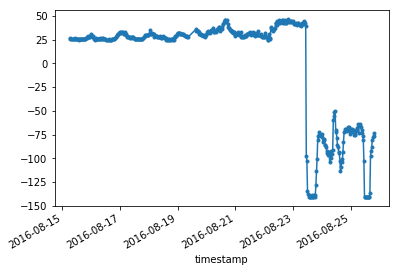

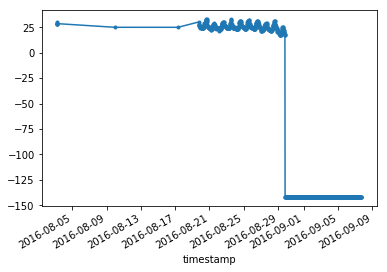

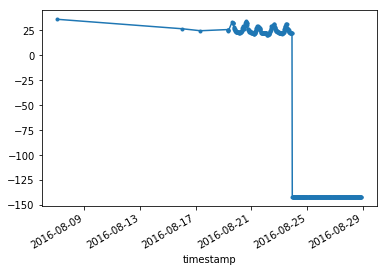

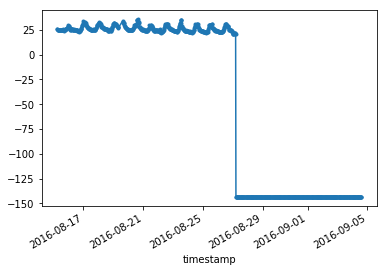

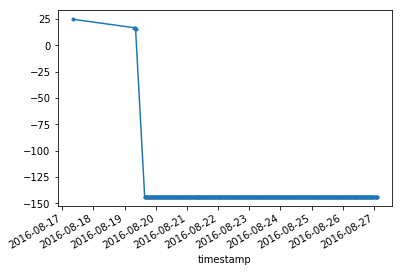

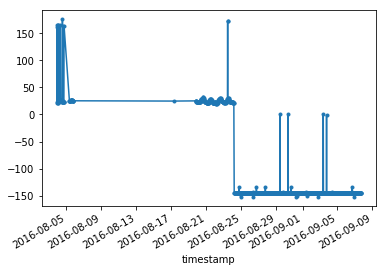

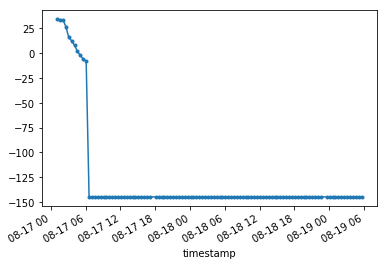

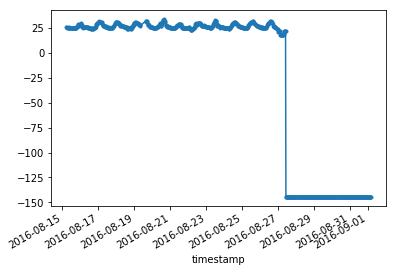

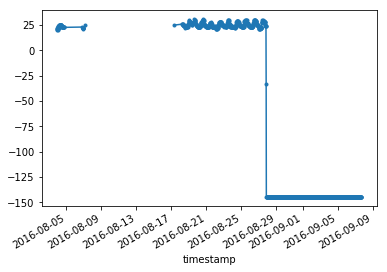

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
##### THIS WORKED!!!!!!!
# Plot each sensor and save separately to files.

grouped = data_dp.groupby('sensor_id')
ordered_sensor_names = grouped['value'].last().sort_values(ascending=False).index

for sensor in ordered_sensor_names:
    selection = grouped.get_group(sensor)
    selection.plot(x='timestamp', y='value', label=sensor, legend=False, marker='.')
    plt.savefig("Graph" + sensor +".png", format="PNG")

Plotting each sensor allows us to understand how the workings of each sensor, based on time.
It helps us to see whether there is a pattern - trend, seasonality, or frequency; with the readings from the sensors.
This helps to understand the overall health of the equipment, and helps us to know the next action to take.

In this particular dataset, although having missing data, there is most likely to be underlying trends within the observed period.
Understanding trend and seasonality also helps with adequately assuming the nature of missing data.

In [ ]:
# seems the plotly interactive widget only works with Ipython notebooks. Can't seem to get it to work here

In [ ]:
#init_notebook_mode(connected=True)   # initiate notebook for offline plot

In [ ]:
#from plotly.offline import init_notebook_mode, iplot
#import chart_studio.plotly as py
#import plotly.graph_objects as go

In [ ]:
#import plotly.io as pio
#pio.renderers

### 3.0 Descriptive Analysis One data frame at a time **

3.1: How many sensors of each type are there?

In [ ]:
#To answer the question of how many sensors of each type are there, use the sensors dataset instead. 
#This is because the datapoints data sets gives the sensor readings.

In [ ]:
#s2.type_id.value_counts()

In [ ]:
data_dt # view data types dataframe (for comparison)

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S
5,35dcdad2-8679-11e6-bda3-ef77801087ee,battery,percentage,BAT
6,ed5edee0-e701-11e6-83c1-01ce06e6d17f,RSAM,counts,RSAM


In [ ]:
# Check count for each sensor type in sensors dataframe
data_s.data_type_id.value_counts()

35dcdad1-8679-11e6-bda3-ef77801087ee    10
35dcdad0-8679-11e6-bda3-ef77801087ee    10
35dcdad2-8679-11e6-bda3-ef77801087ee    10
35dcb3c1-8679-11e6-bda3-ef77801087ee    10
35dcb3c0-8679-11e6-bda3-ef77801087ee    10
35dcb3c2-8679-11e6-bda3-ef77801087ee    10
ed5edee0-e701-11e6-83c1-01ce06e6d17f     1
Name: data_type_id, dtype: int64


From the above, generally, there are 10 sensors of each type, apart from the RSAM sensor type

.

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

You have two data frames: `sensors` and `types` Merge each sensors with its type. (Hint: Use `pd.merge()`)

Question: What does this achieve? Why should we do this?

###### Create a copy of necessary dataframes

In [ ]:
s_types = data_dt.copy() # create a copy of the data types dataframe

In [ ]:
data = data_dp.copy() # create a copy of the data points dataframe

In [ ]:
sensors = data_s.copy() # create a copy of the sensors dataframe

###### Merge sensor and type dataframes

In [ ]:
# examine dataframe
s_types.head(1)

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA


In [ ]:
# examine dataframe
sensors.head(1)

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491


In [ ]:
# rename 'id' column to 'data_type_id' in the data type dataframeto aid easy merging
s_types.rename(columns={'id':'data_type_id'}, inplace=True)

In [ ]:
# merge types dataframe with sensors dataframe
sensor_types = sensors.merge(s_types, on='data_type_id', how='left')

In [ ]:
# examine new dataframe
sensor_types.head(1)

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2


In [ ]:
sensor_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 11 columns):
id                61 non-null object
description       61 non-null object
data_frequency    61 non-null int64
status            61 non-null object
created_at        61 non-null datetime64[ns]
updated_at        61 non-null datetime64[ns]
data_type_id      61 non-null object
node_id           61 non-null object
type              61 non-null object
si_unit           61 non-null object
type_id           61 non-null object
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 5.7+ KB


###### Now take the raw `data` data frame and merge it with all the `sensors` and their types.

In [ ]:
#full = pd.merge(data, s2, left_on='sensor_id', right_on='id_x')

In [ ]:
# now rename 'id' column to 'sensor_id' in the new dataframe for easy merging
sensor_types.rename(columns={'id':'sensor_id'}, inplace=True)

In [ ]:
# examine dataframe
sensor_types.head(1)

,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2


In [ ]:
#merge dataframes

In [ ]:
# merge sensors dataframe with sensor data dataframe
full = data.merge(sensor_types, on='sensor_id', how='left')

In [ ]:
full.head(3)

,id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.797,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,hydrogen sulfide concentration,ppm,GP_H2S
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA


In [ ]:
# check that new dataframe is okay
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 14 columns):
id                176534 non-null object
value             63456 non-null float64
timestamp         176534 non-null datetime64[ns]
sensor_id         176534 non-null object
description       176534 non-null object
data_frequency    176534 non-null int64
status            176534 non-null object
created_at        176534 non-null datetime64[ns]
updated_at        176534 non-null datetime64[ns]
data_type_id      176534 non-null object
node_id           176534 non-null object
type              176534 non-null object
si_unit           176534 non-null object
type_id           176534 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(9)
memory usage: 20.2+ MB


###### Question: What does this achieve? Why should we do this?

In merging the dataframes the way we have now done above, it has become very easy when reading, to match the sensor readings with each sensor type. 
This means that there would be no need to switch between multiple files just to make one reading. 
This also means that I can now know which type of sensor is making what type of reading. 
This in turn makes data analysis easy as it means that outliers are more accurately detected according to sensor types.

In [ ]:
#My extra codes; storage

In [ ]:
#Check count for each sensor type after merge
#pd.set_option('display.max_rows', None) #do not truncate rows in display

#print(df.data_type_id.value_counts())

#pd.reset_option('display.max_rows') #reset to default

In [ ]:
#Check count for each sensor type
#pd.set_option('display.max_rows', None) #do not truncate rows in display

#print(data_dp.sensor_id.value_counts())

#pd.reset_option('display.max_rows') #reset to default

-----

### 5.0 Time Series based analysis

Now, we are going to take this stitiched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Step 1: Take the `full` data frame and make the Time Stamp datetime format
    Step 2: Resample the dataset to the daily level. (One observation per date)
    Step 3: For the resampled data, calculate the daily mean, min and max values for each sensor.

Resample to get daily averages.
Then subset to select the rows you need.

###### I have already done Step 1 earlier in the notebook immediately after importing

###### Step 2

In [ ]:
#df[df.type_id=='HUMA']['value'].resample('D')

In [ ]:
# to do this, make the timestamp datetime the index
df = full.copy() #make a copy of 'full' dataframe

df.index = df['timestamp'] #set datetime column as index

In [ ]:
# calculate daily summary by individual sensor
sensor_daily_summary = df.groupby(['sensor_id', pd.Grouper(key='timestamp', freq='D')])['value'].agg(['mean', 'min', 'max'])

####alternates; tests; worked up to final code
#df.groupby(['sensor_id', pd.Grouper(key='timestamp', freq='D')])['value'].mean()
#df.groupby([pd.Grouper(freq='D'), 'value'])
#df.groupby(Grouper(key='date', freq='60s'))
#df.groupby('sensor_id')['value'].resample('D').mean()
#df.groupby('sensor_id').resample('D')['value'].mean()
#df.value.resample('D').mean() #didn't work
#df.value.resample('D')
#df.groupby('sensor_id')

#daily_summary = pd.DataFrame()
#daily_summary['mean'] = df.groupby('sensor_id')['value'].resample('D').mean()
#daily_summary['distance'] = df.distance.resample('W').sum()
#weekly_summary['cumulative_distance'] = df.cumulative_distance.resample('W').last()

Running the code above will store the mean, min, and max of the daily summaries of each sensor in variable sensor_daily_summary

In [ ]:
# Proof
sensor_daily_summary.head()

mean    min    max
sensor_id                            timestamp                           
1248ff60-e707-11e6-89c8-314aa4f67f8c 2016-07-01  306.902098   81.0  683.0
                                     2016-07-02  267.804196  113.0  558.0
                                     2016-07-03  286.972028  109.0  513.0
                                     2016-07-04  339.860140   89.0  637.0
                                     2016-07-05  445.828571  124.0  612.0

###### Doing it by sensor types

In [ ]:
# calculate daily summary by individual sensor
types_daily_summary = df.groupby(['type', pd.Grouper(key='timestamp', freq='D')])['value'].agg(['mean', 'min', 'max'])

In [ ]:
types_daily_summary

mean     min      max
type        timestamp                              
RSAM        2016-07-01  306.902098   81.00   683.00
            2016-07-02  267.804196  113.00   558.00
            2016-07-03  286.972028  109.00   513.00
            2016-07-04  339.860140   89.00   637.00
            2016-07-05  445.828571  124.00   612.00
            2016-07-06  391.852113  144.00   598.00
            2016-07-07  305.769231  128.00   530.00
            2016-07-08  368.349650  104.00   681.00
            2016-07-09  265.442748   84.00   581.00
            2016-07-10  408.825175   74.00   695.00
            2016-07-11  253.852113   75.00   865.00
            2016-07-12  266.676056   78.00   562.00
            2016-07-13  328.748252   79.00   636.00
            2016-07-14  341.692308   97.00   615.00
            2016-07-15  270.146853   80.00   640.00
            2016-07-16  315.202797  102.00   579.00
            2016-07-17  252.916084   67.00   615.00
            2016-07-18  263.022222   70.00   614.00
            2016-07-19  134.272727   68.00   454.00
            2016-07-20  143.685315   82.00   357.00
            2016-07-21  285.503497  115.00   560.00
            2016-07-22  195.678322   71.00  1170.00
            2016-07-23  196.785714   92.00   519.00
            2016-07-24  250.069930   88.00   529.00
            2016-07-25  411.699301  117.00   691.00
            2016-07-26  224.022222   93.00   586.00
            2016-07-27  424.114286  111.00   757.00
            2016-07-28  369.887324  102.00   720.00
            2016-07-29  198.237762   98.00   487.00
            2016-07-30  371.083916   92.00   630.00
...                            ...     ...      ...
temperature 2016-08-20    8.976558 -144.12    45.95
            2016-08-21    6.257908 -144.12    34.06
            2016-08-22    8.653440 -144.12    46.59
            2016-08-23   -1.055931 -144.12   172.79
            2016-08-24  -39.286419 -152.89    33.46
            2016-08-25  -42.106974 -145.06    34.92
            2016-08-26  -47.214137 -152.97    31.60
            2016-08-27  -76.549215 -145.16    29.68
            2016-08-28 -116.421610 -145.16    31.05
            2016-08-29 -117.638048 -145.16    25.53
            2016-08-30 -143.442840 -145.16     0.83
            2016-08-31 -144.164219 -152.89  -142.12
            2016-09-01 -144.038957 -151.29  -142.12
            2016-09-02 -143.964010 -152.89  -142.12
            2016-09-03 -142.444350 -145.16     0.15
            2016-09-04 -143.932228 -145.16  -142.12
            2016-09-05 -143.974894 -145.16  -142.12
            2016-09-06 -143.917600 -152.89  -133.24
            2016-09-07 -143.947129 -145.16  -142.12
            2016-09-26         NaN     NaN      NaN
            2016-09-27         NaN     NaN      NaN
            2016-09-28         NaN     NaN      NaN
            2016-09-29         NaN     NaN      NaN
            2016-09-30         NaN     NaN      NaN
            2016-10-01         NaN     NaN      NaN
            2016-10-02         NaN     NaN      NaN
            2016-10-03         NaN     NaN      NaN
            2016-10-04         NaN     NaN      NaN
            2016-10-05         NaN     NaN      NaN
            2016-10-06         NaN     NaN      NaN

[314 rows x 3 columns]

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1. Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/Corr_plot.JPG" width=450>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

Text(0.5, 1.0, 'Temperature Sensors Readings')

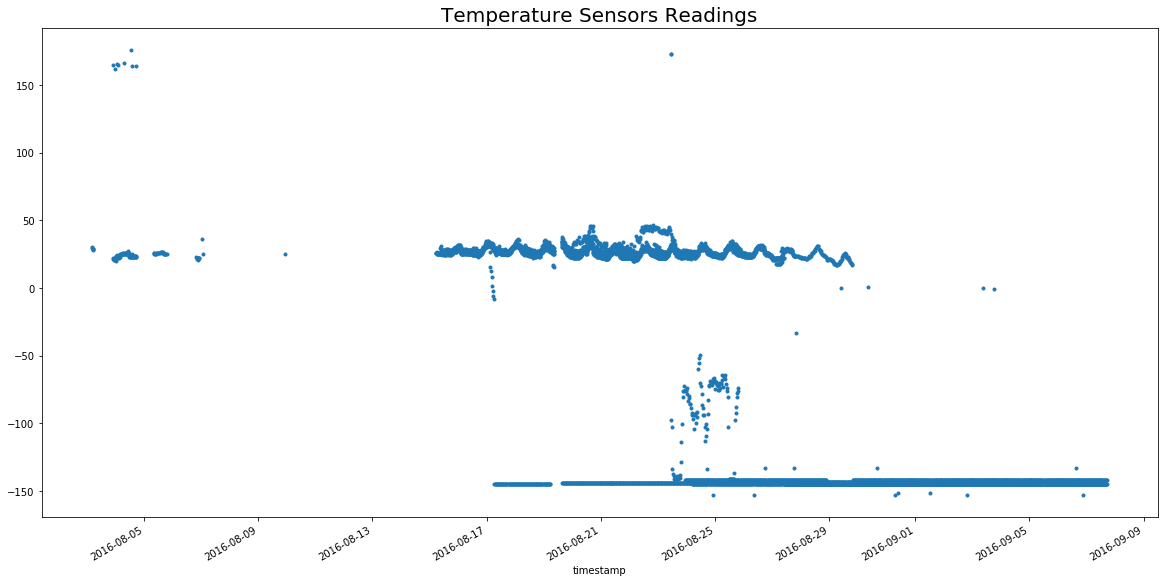

In [ ]:
criteria = df.type_id == 'TCA' # define filter in a variable; all temperature sensors with no demarcation

# plot
plt.figure(figsize=(20,10))
df[criteria]['value'].plot(linestyle='None', marker='.')
plt.title ('Temperature Sensors Readings', size=20)

In [ ]:
# make use of merged dataframe with just sensors and types
temp_sensors = [s for s in sensor_types[sensor_types.type_id =='TCA']['sensor_id']] 
#temperature_sensors = [s for t,s in zip(s2['type_id'], s2['id_x']) if t=='TCA'] # alternative way

In [ ]:
temp_sensors

['763ca6f0-8679-11e6-a353-2f6c041e2491',
 'c15a6371-8679-11e6-a353-2f6c041e2491',
 '7644bd40-8679-11e6-a353-2f6c041e2491',
 'c15f9391-8679-11e6-a353-2f6c041e2491',
 '763bbc90-8679-11e6-a353-2f6c041e2491',
 'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
 'd3d909c1-8679-11e6-a353-2f6c041e2491',
 'd3d53930-8679-11e6-a353-2f6c041e2491',
 'c5e881a1-867a-11e6-a353-2f6c041e2491',
 'e6678e91-8679-11e6-a353-2f6c041e2491']

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Use the following trick to do this is to plot one line at a time, over and over in a loop

Text(0.5, 1.0, 'Temperature Sensors Readings by Individual Sensors')

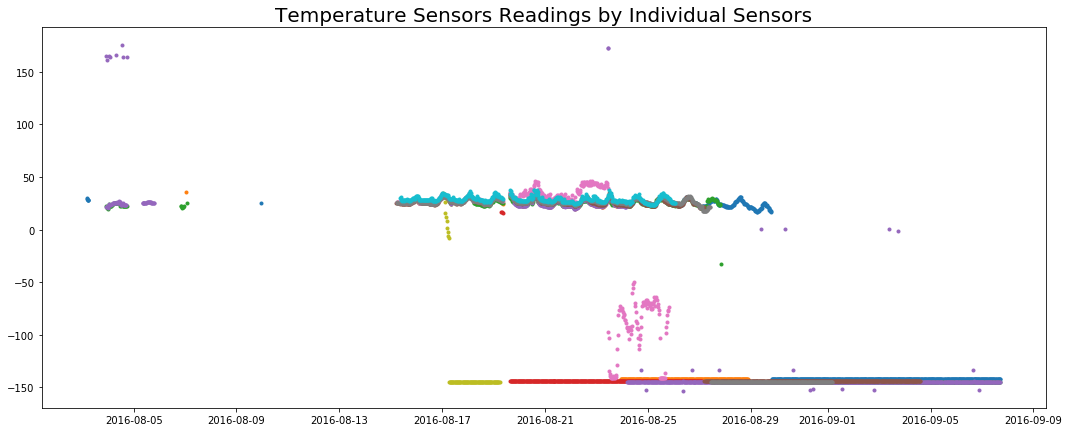

In [ ]:
plt.figure(figsize=(18,7))

# df is my own 'full'
for s in temp_sensors:
    #print(s)
    sub_df = df[df['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')

# set figure title
plt.title ('Temperature Sensors Readings by Individual Sensors', size=20)

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Creating Subplots - Each sensor gets its own panel**

In [ ]:
# from matplotlib.legend import Legend #for legends
from matplotlib import cm # import rainbow map

Text(0.5, 0.89, 'Temperature Sensors Readings by Individual Sensors; Subplots')

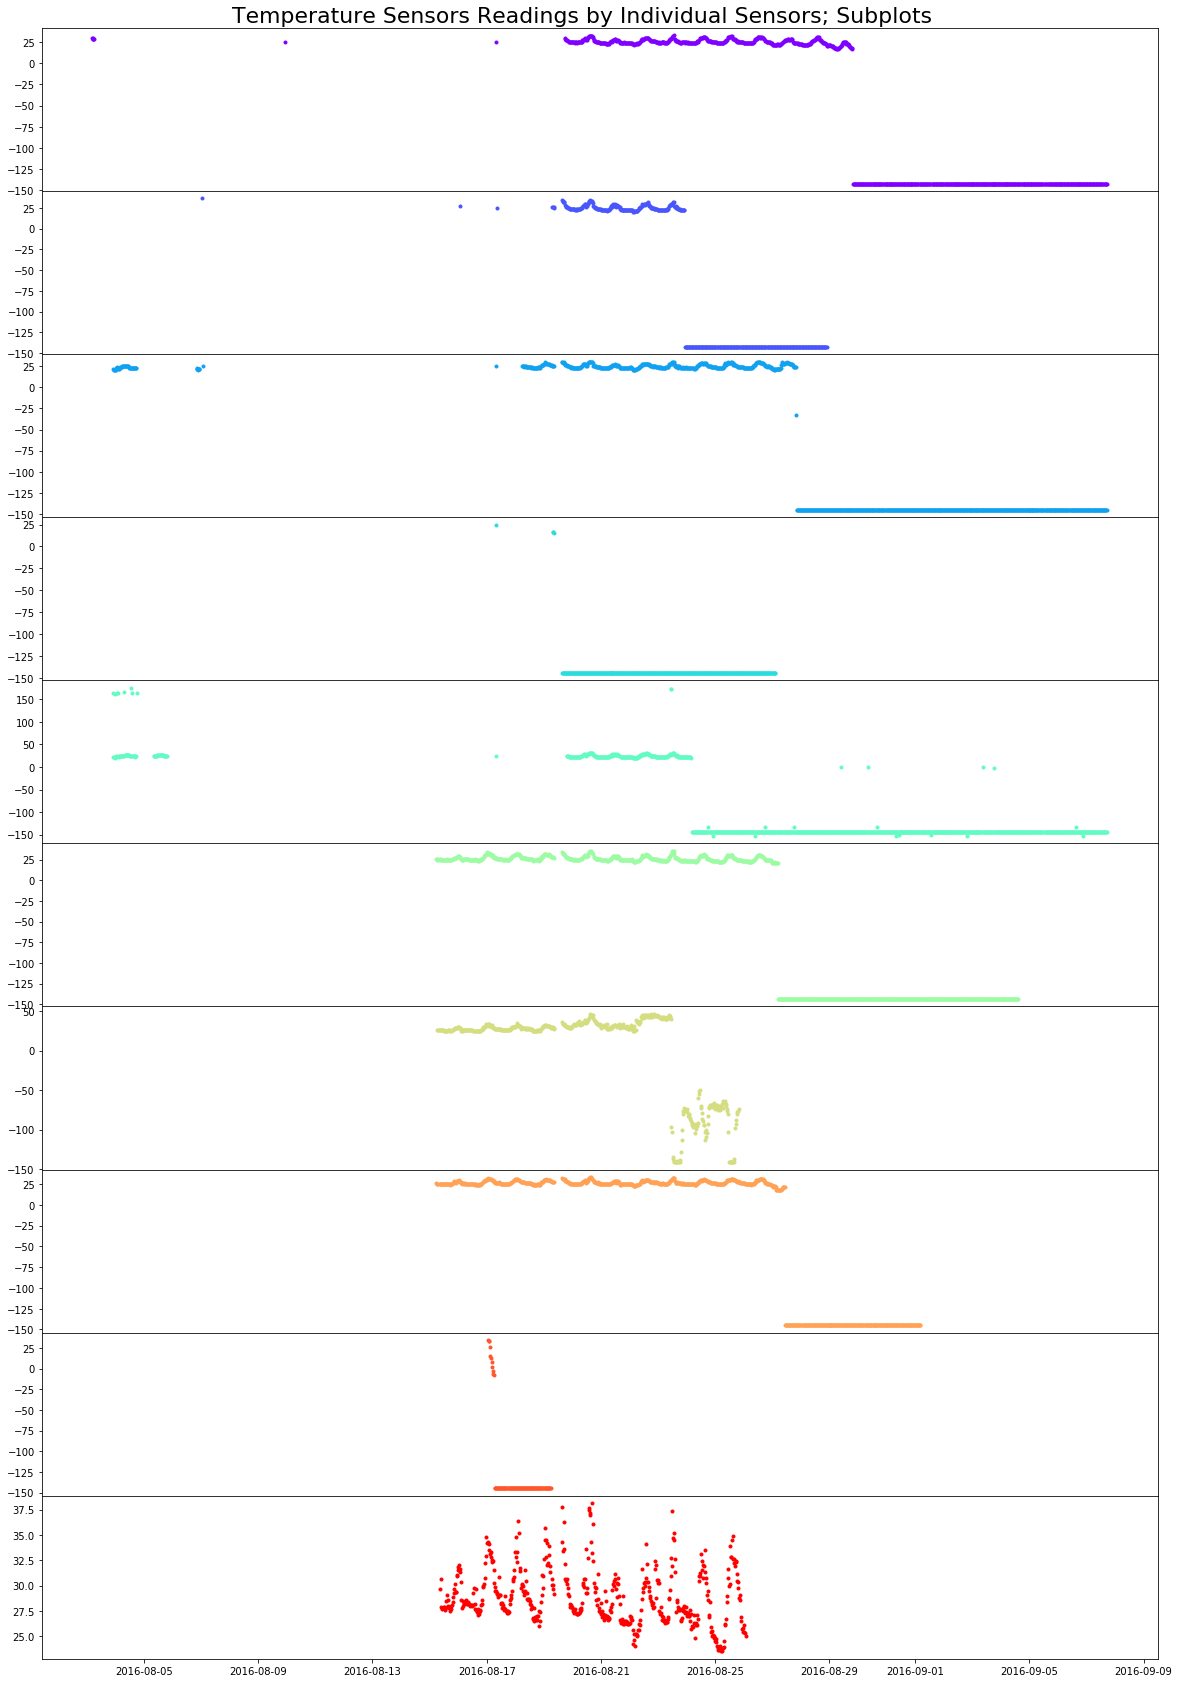

<Figure size 1296x1440 with 0 Axes>

In [ ]:
fig, axarr = plt.subplots(10, sharex=True)
fig.set_size_inches(20,30) 

plt.figure(figsize=(18,20))

# Define the colors to be used using rainbow map 
colors = [cm.rainbow(i) for i in np.linspace(0, 1, len(temp_sensors))]

# df is my own 'full' dataframe
for i, s in enumerate(temp_sensors):
    sub_df = df[df['sensor_id']==s]
    axarr[i].plot(sub_df.index, sub_df['value'], '.', color=colors[i])

# Bring subplots close to each other.
fig.subplots_adjust(hspace=0)

# set figure title
fig.suptitle ('Temperature Sensors Readings by Individual Sensors; Subplots', size=22, y=0.89) #set general title

**Task: Creating a reshaped Data Frame of just Temperature sensors**

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [ ]:
# df.pivot(index='patient', columns='obs', values='score')

In [ ]:
df.head(2)

,id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
timestamp,,,,,,,,,,,,,,
2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-03 04:39:25,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.797,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,hydrogen sulfide concentration,ppm,GP_H2S


In [ ]:
temp_df = df[df['sensor_id'].isin(temp_sensors)]
del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df

,timestamp,id,value,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,2016-08-03 04:39:25,764dbdf0-8679-11e6-a353-2f6c041e2491,29.30,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1,2016-08-03 04:47:41,76514060-8679-11e6-a353-2f6c041e2491,29.94,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
2,2016-08-03 05:08:52,76584540-8679-11e6-a353-2f6c041e2491,28.61,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
3,2016-08-03 05:14:08,765dea91-8679-11e6-a353-2f6c041e2491,28.24,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
4,2016-08-03 05:28:55,7661bb20-8679-11e6-a353-2f6c041e2491,28.57,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
5,2016-08-03 05:35:46,7665b2c1-8679-11e6-a353-2f6c041e2491,28.53,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.803,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
6,2016-08-03 21:50:32,76690e22-8679-11e6-a353-2f6c041e2491,164.60,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32,2016-09-30 18:12:04.578,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
7,2016-08-03 22:09:40,766d7af0-8679-11e6-a353-2f6c041e2491,22.19,7644bd40-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40,2016-09-29 19:20:17.417,35dcb3c0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
8,2016-08-03 22:20:28,7670af40-8679-11e6-a353-2f6c041e2491,21.29,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32,2016-09-30 18:12:04.578,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
9,2016-08-03 22:39:34,76767ba0-8679-11e6-a353-2f6c041e2491,21.14,7644bd40-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40,2016-09-29 19:20:17.417,35dcb3c0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA


In [ ]:
temp_df.pivot(columns='sensor_id', values='value')

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
0,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,28.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,28.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,28.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,164.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,22.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,21.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [ ]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,timestamp,id,value,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
1584,2016-08-20 20:46:05,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1599,2016-08-20 20:46:05,0d34bc60-867e-11e6-a353-2f6c041e2491,25.64,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1808,2016-08-21 08:21:30,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1819,2016-08-21 08:21:30,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1791,2016-08-21 08:51:26,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1815,2016-08-21 08:51:26,a2c5c490-867e-11e6-a353-2f6c041e2491,-144.12,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22,2016-09-29 19:20:17.516,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1826,2016-08-21 09:15:37,b5280940-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1827,2016-08-21 09:15:37,b529de00-867e-11e6-a353-2f6c041e2491,26.56,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1982,2016-08-21 15:45:34,00267df0-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA
1997,2016-08-21 15:45:34,0027b670-867f-11e6-a353-2f6c041e2491,26.12,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31,2016-09-30 18:12:04.580,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,temperature,celcius,TCA


**Task: Drop all the rows where timestamp and sensor_id are duplicated**

In [ ]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [ ]:
# Create dataframe for correlation
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')

In [ ]:
# Create a daily summaries dataframe for correlation
daily_temp_cor_df = temp_df_cor.resample('D').mean()

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [ ]:
# compute correlation
corr_df = daily_temp_cor_df.corr()

In [ ]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

In [ ]:
#import necessities
import seaborn as sns 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

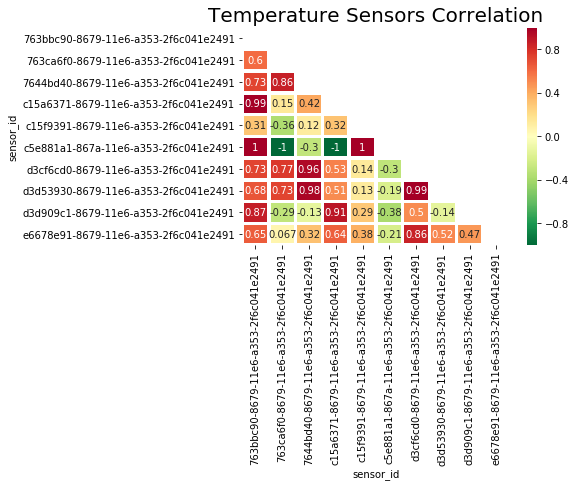

In [ ]:
# Create the heatmap using seaborn library. 
# List of colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, annot=True, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)

# set figure title
plt.title ('Temperature Sensors Correlation', size=20)

# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
#plt.show() # unnecessary

In [ ]:
# drop duplicates while keeping first occurrences
full2 = df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first') 

In [ ]:
# pivot table with each sensor as columns
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [ ]:
# take mean of daily summary
daily_all_sensors = full_wide.resample('D').mean() 

In [ ]:
# view new dataframe
daily_all_sensors 

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,286.972028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,339.860140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,445.828571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,391.852113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,305.769231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,368.349650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-09,265.442748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Trying to build a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [ ]:
# Get the node names from the nodes dataframe
data_n.name 

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT], and then, RSAM

In [ ]:
df.head(1)

,id,value,timestamp,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
timestamp,,,,,,,,,,,,,,
2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


In [ ]:
data_n

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49.000,2016-09-29 19:28:05.932,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40.000,2016-09-29 19:41:07.065,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40.000,2016-09-29 19:20:17.417,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25.000,2016-09-29 19:20:17.431,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22.000,2016-09-29 19:20:17.523,35dc3e90-8679-11e6-bda3-ef77801087ee
5,d3cbc350-8679-11e6-a353-2f6c041e2491,N3,\N,\N,OFFLINE,2016-08-15 06:10:39.000,2016-10-05 12:42:18.953,35dc3e90-8679-11e6-bda3-ef77801087ee
6,762c5340-8679-11e6-a353-2f6c041e2491,N7,\N,\N,OFFLINE,2016-08-03 21:50:32.000,2016-10-07 07:43:05.001,35dc3e90-8679-11e6-bda3-ef77801087ee
7,d3ca3cb0-8679-11e6-a353-2f6c041e2491,N4,\N,\N,OFFLINE,2016-08-15 05:22:31.000,2016-10-07 07:43:05.001,35dc3e90-8679-11e6-bda3-ef77801087ee
8,d3cb7530-8679-11e6-a353-2f6c041e2491,N5,\N,\N,OFFLINE,2016-08-15 05:31:29.000,2016-10-07 07:43:05.002,35dc3e90-8679-11e6-bda3-ef77801087ee
9,ede3ed60-e701-11e6-83c1-01ce06e6d17f,RSAM,\N,\N,OFFLINE,1970-01-17 23:35:31.231,2017-01-30 16:24:05.867,35dc3e90-8679-11e6-bda3-ef77801087ee


In [ ]:
# merge the two dataframes
fullnode = pd.merge(df, data_n, left_on='node_id', right_on='id')

In [ ]:
fullnode.columns, fullnode.index

(Index(['id_x', 'value', 'timestamp', 'sensor_id', 'description_x',
        'data_frequency', 'status_x', 'created_at_x', 'updated_at_x',
        'data_type_id', 'node_id', 'type', 'si_unit', 'type_id', 'id_y', 'name',
        'description_y', 'location', 'status_y', 'created_at_y', 'updated_at_y',
        'volcano_id'],
       dtype='object'),
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
             176532, 176533],
            dtype='int64', length=176534))

In [ ]:
fullnode.head(1)

,id_x,value,timestamp,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,...,si_unit,type_id,id_y,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,...,percentage,BAT,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25,2016-09-29 19:20:17.431,35dc3e90-8679-11e6-bda3-ef77801087ee


In [ ]:
fullnode.set_index('timestamp', inplace=True)

In [ ]:
fullnode.resample('D').mean() # resample daily

,value,data_frequency
timestamp,,
2016-07-01,306.902098,1800000.0
2016-07-02,267.804196,1800000.0
2016-07-03,286.972028,1800000.0
2016-07-04,339.860140,1800000.0
2016-07-05,445.828571,1800000.0
2016-07-06,391.852113,1800000.0
2016-07-07,305.769231,1800000.0
2016-07-08,368.349650,1800000.0
2016-07-09,265.442748,1800000.0


In [ ]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [ ]:
# pivot table with each sensor as columns
#full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [ ]:
fn_wide.head(10)

,type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,name,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:50:00,RSAM,411.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 01:00:00,RSAM,419.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 01:10:00,RSAM,390.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 01:20:00,RSAM,479.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [ ]:
fn_wide.head(3)

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fn_wide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36329 entries, 2016-07-01 00:00:31 to 2016-10-06 07:32:51
Data columns (total 8 columns):
name                              36329 non-null object
RSAM                              8816 non-null float64
battery                           27513 non-null float64
carbon dioxide concentration      1400 non-null float64
humidity                          6587 non-null float64
hydrogen sulfide concentration    4939 non-null float64
pressure                          6587 non-null float64
temperature                       6586 non-null float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


In [ ]:
fn_wide.isnull().sum()

type
name                                  0
RSAM                              27513
battery                            8816
carbon dioxide concentration      34929
humidity                          29742
hydrogen sulfide concentration    31390
pressure                          29742
temperature                       29743
dtype: int64

NB: I have observed that the percentage of missing data is way too large!
In a typical situation, more data would have to be acquired in order to carry out a proper analysis

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [ ]:
lmfn = fn_wide.resample('D').mean()

In [ ]:
# compute statistical analysis to understand data distribution
lmfn.describe()

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
count,62.000000,42.000000,29.000000,30.000000,30.000000,3.000000e+01,30.000000
mean,261.939330,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
std,100.862440,20.952203,245.431962,19.626852,148.254949,1.563750e+06,74.441163
min,86.496503,38.742520,1.165304,28.960396,0.189331,9.199418e+04,-144.177671
25%,183.818182,55.750785,150.738548,39.876103,0.336605,9.759493e+04,-143.175446
50%,264.232485,78.115251,335.450750,61.747112,0.931684,1.064047e+05,-20.736104
75%,337.113636,96.024306,516.037000,76.540694,2.235000,2.481076e+06,18.640262
max,494.041958,97.419608,935.874162,87.126642,813.951000,5.164205e+06,43.191333


In [ ]:
lmfn.shape

(98, 7)

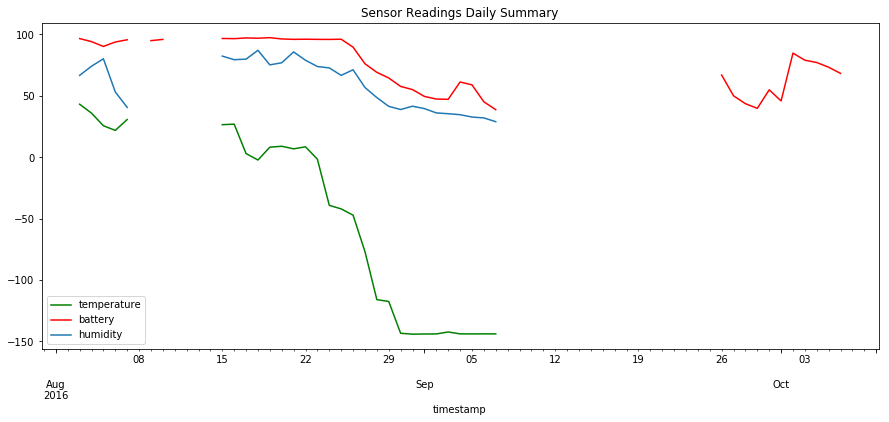

In [ ]:
fig = plt.figure(figsize=(15, 6))#set graph size

# temperature
lmfn.temperature.plot(title='Sensor Readings Daily Summary', color='green', label='temperature') 
plt.legend()

# battery
lmfn.battery.plot(color='red', label='battery') 
plt.legend()

# humidity
lmfn.humidity.plot(label='humidity') 
plt.legend()

#plt.xlabel('Months(per week)')

There is certainly trend in this data. Filling missing values without being careful would result in bias
Filling with mean, mode, and/or median, is definitely not an option.
Reference: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

###### Attempt to create another dataset with filled missing values

In [ ]:
df_interpol = fullnode.groupby('type').resample('D').mean()
df_interpol['value'] = df_interpol['value'].interpolate()

In [ ]:
df_interpol['value'].describe()

count    2.234000e+03
mean     2.346138e+05
std      1.537003e+06
min     -1.451600e+02
25%      2.441941e+01
50%      8.089451e+01
75%      4.088547e+02
max      1.675654e+07
Name: value, dtype: float64

In [ ]:
df_interpol.isnull()

value  data_frequency
sensor_id                            timestamp                        
1248ff60-e707-11e6-89c8-314aa4f67f8c 2016-07-01  False           False
                                     2016-07-02  False           False
                                     2016-07-03  False           False
                                     2016-07-04  False           False
                                     2016-07-05  False           False
                                     2016-07-06  False           False
                                     2016-07-07  False           False
                                     2016-07-08  False           False
                                     2016-07-09  False           False
                                     2016-07-10  False           False
                                     2016-07-11  False           False
                                     2016-07-12  False           False
                                     2016-07-13  False           False
                                     2016-07-14  False           False
                                     2016-07-15  False           False
                                     2016-07-16  False           False
                                     2016-07-17  False           False
                                     2016-07-18  False           False
                                     2016-07-19  False           False
                                     2016-07-20  False           False
                                     2016-07-21  False           False
                                     2016-07-22  False           False
                                     2016-07-23  False           False
                                     2016-07-24  False           False
                                     2016-07-25  False           False
                                     2016-07-26  False           False
                                     2016-07-27  False           False
                                     2016-07-28  False           False
                                     2016-07-29  False           False
                                     2016-07-30  False           False
...                                                ...             ...
e66851e1-8679-11e6-a353-2f6c041e2491 2016-09-02  False           False
                                     2016-09-03  False           False
                                     2016-09-04  False           False
                                     2016-09-05  False           False
                                     2016-09-06  False           False
                                     2016-09-07  False           False
e6691530-8679-11e6-a353-2f6c041e2491 2016-08-15  False           False
                                     2016-08-16  False           False
                                     2016-08-17  False           False
                                     2016-08-18  False           False
                                     2016-08-19  False           False
                                     2016-08-20  False           False
                                     2016-08-21  False           False
                                     2016-08-22  False           False
                                     2016-08-23  False           False
                                     2016-08-24  False           False
                                     2016-08-25  False           False
                                     2016-08-26  False           False
                                     2016-08-27  False           False
                                     2016-08-28  False           False
                                     2016-08-29  False           False
                                     2016-08-30  False           False
                                     2016-08-31  False           False
                                     2016-09-01  False           False
  

In [ ]:
# Interpolating to fill missing data worked, but I can seem to make any use of this data frame. Try another method.

In [ ]:
## method 2
# use .transform
df_interpol2 = fullnode.groupby('sensor_id').transform(pd.DataFrame.interpolate)

In [ ]:
df_interpol2.isnull()

,id_x,value,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,node_id,type,si_unit,type_id,id_y,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
timestamp,,,,,,,,,,,,,,,,,,,,
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:39:25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:47:41,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:47:41,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-08-03 04:47:41,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide2 = df_interpol2.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [ ]:
# Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide2.reset_index(level=1, inplace=True)

In [ ]:
lmfn2 = fn_wide2.resample('D').mean()

In [ ]:
lmfn2.isnull().sum()

type
RSAM                              36
battery                           56
carbon dioxide concentration      57
humidity                          57
hydrogen sulfide concentration    57
pressure                          57
temperature                       57
dtype: int64

There still are a lot of missing values. But I'll make do with what I have

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [ ]:
# compute correlation to confirm choice of x variable(s)
corr_lmfn = lmfn.corr()

In [ ]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_lmfn)
mask[np.triu_indices_from(mask)] = True

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

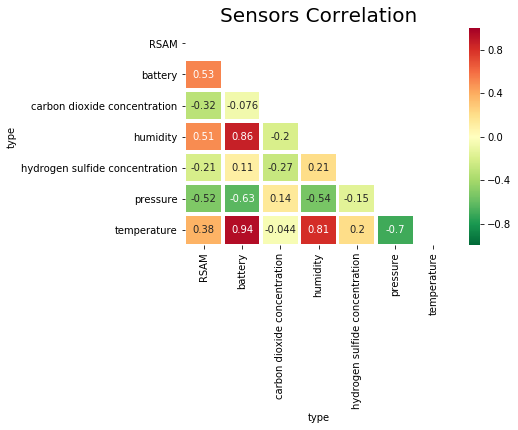

In [ ]:
# Create the heatmap using seaborn library. 
sns.heatmap(corr_lmfn, annot=True, cmap='RdYlGn_r', vmax=1.0, mask=mask, vmin=-1.0, linewidths=2.5)

# set figure title
plt.title ('Sensors Correlation', size=20)

# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
#plt.show() # unnecessary

The 3 variables with highest correlation to 'battery' are: Temperature,
                                                            Humidity, and
                                                            Pressure

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

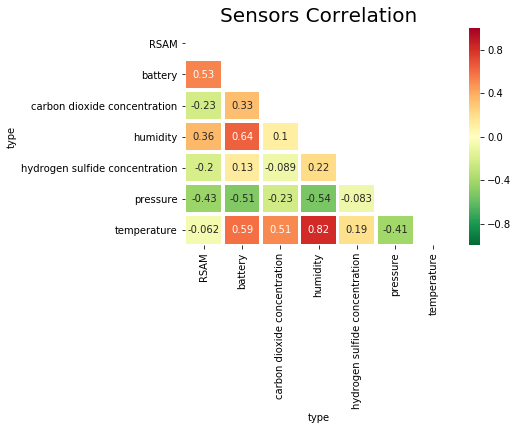

In [ ]:
#FILLED MISSING VALUE

# compute correlation to confirm choice of x variable(s)
corr_lmfn2 = lmfn2.corr()

# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask2 = np.zeros_like(corr_lmfn2)
mask2[np.triu_indices_from(mask2)] = True

# Create the heatmap using seaborn library. 
sns.heatmap(corr_lmfn2, annot=True, cmap='RdYlGn_r', vmax=1.0, mask=mask2, vmin=-1.0, linewidths=2.5)

# set figure title
plt.title ('Sensors Correlation', size=20)

# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
#plt.show() # unnecessary

From the above, humidity is the realest deal

###### Linear Models

In [ ]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================
from sklearn import linear_model

# Split the data into training/testing sets
#train = lmfn[:-30]
#test = lmfn[-30:]

In [ ]:
lmfn.isnull().sum()

type
RSAM                              36
battery                           56
carbon dioxide concentration      69
humidity                          68
hydrogen sulfide concentration    68
pressure                          68
temperature                       68
dtype: int64

In [ ]:
# In dealing with the missing values, many factors to be considered:
 # Deleting all would indeed reduce the size of the dataset
 # Pairwise deletion would not only result in loss of information, but would also be inappropriate for the lmfn dataset  
 # Two variables of my interest - temperature, and humidity, are correlated
 # I cannot double the features by adding isnull featuress since this is not a tree-based model
 # There aren't all linear relationships between x and y

In [ ]:
#train.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [ ]:
#target = 'battery'

In [ ]:
#predictors = 'temperature'

#x_train = train[predictors].to_frame() # converts the pandas Series to numpy.ndarray
#x_test = test[predictors].to_frame() # converts the pandas Series to numpy.ndarray

#y_train = train[target].to_frame()
#y_test = test[target].to_frame()

In [ ]:
# 2.- Create linear regression object
#regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
#regr.fit(x_train, y_train)

# The coefficients
#print("Coefficients: ",  float(regr.coef_))
# The mean squared error
#print("Mean squared error: %.2f"
      #% np.mean((regr.predict(x_train) - y_train) ** 2))

###### First Model

In [ ]:
model_data = lmfn.dropna()

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2016-08-03 to 2016-08-31
Data columns (total 7 columns):
RSAM                              22 non-null float64
battery                           22 non-null float64
carbon dioxide concentration      22 non-null float64
humidity                          22 non-null float64
hydrogen sulfide concentration    22 non-null float64
pressure                          22 non-null float64
temperature                       22 non-null float64
dtypes: float64(7)
memory usage: 1.4 KB


In [ ]:
# Train-test Split

train_data2 = model_data[:-11]
test_data2 = model_data[-11:]

In [ ]:

X_train2 = train_data2[['temperature', 'humidity']]
X_test2 = test_data2[['temperature', 'humidity']]
# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
# Alternatively, you may add additional variables within the brackets

Y_train2 = train_data2['battery']
Y_test2 = test_data2['battery']

In [ ]:
# with sklearn
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
Y_pred2 = regr2.predict(X_test2)

# The coefficients
print("Coefficients: ", regr2.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr2.predict(X_train2) - Y_train2) ** 2))

Coefficients:  [-0.05105742 -0.00277802]
Mean squared error: 3.65


In [ ]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test2, Y_pred2)))

Root Mean Squared Error: 26.718201118916912


In [ ]:
Y_test2

timestamp
2016-08-21    96.039535
2016-08-22    96.150463
2016-08-23    96.032407
2016-08-24    95.992991
2016-08-25    96.147541
2016-08-26    89.680556
2016-08-27    76.163652
2016-08-28    69.163208
2016-08-29    64.550936
2016-08-30    57.702793
2016-08-31    55.100115
Name: battery, dtype: float64

In [ ]:
Y_pred2

array([ 96.31826516,  96.25155783,  96.78235818,  98.70422059,
        98.86969775,  99.11779258, 100.67282855, 102.6948035 ,
       102.79136857, 104.1207092 , 104.15101722])

In [ ]:
Model performed poorly on lower values. 
This could have been corrected by normalisation, but that too had issues

Horrible Model

###### Second Model

In [ ]:
X_train3 = train_data2['temperature']
X_test3 = test_data2['temperature']
# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
# Alternatively, you may add additional variables within the brackets

Y_train3 = train_data2['battery']
Y_test3 = test_data2['battery']

In [ ]:
# with sklearn
regr3 = linear_model.LinearRegression()

#lr2.fit(X = np.array(PP).reshape(-1, 1),y = INTEREST)

regr3.fit(X=np.array(X_train3).reshape(-1, 1), y=Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# The coefficients
print("Coefficients: ", regr3.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr3.predict(np.array(X_train3).reshape(-1, 1)) - Y_train3) ** 2))

Coefficients:  [-0.0499014]
Mean squared error: 3.65


No point trying to get RMSE score on this. It's similar to the above.

The above models are very bad predictors of the battery level

In [ ]:
#rmse2 = (np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
#rmse2
#test_set_r2 = r2_score(y_test, pred)

###### Third Model
######## Use data upon which .interpolate() function was executed

In [ ]:
model_data2 = lmfn2.dropna() #drop missing values

In [ ]:
model_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2016-08-03 to 2016-08-31
Data columns (total 7 columns):
RSAM                              23 non-null float64
battery                           23 non-null float64
carbon dioxide concentration      23 non-null float64
humidity                          23 non-null float64
hydrogen sulfide concentration    23 non-null float64
pressure                          23 non-null float64
temperature                       23 non-null float64
dtypes: float64(7)
memory usage: 1.4 KB


Not much difference at all. 
Continue to satisfy all curiosity

In [ ]:
# Train-test Split
# Use 80:20 ratio this time

train_data3 = model_data2[:-18]
test_data3 = model_data2[-5:]

In [ ]:
# Use only humidity as second heatmap showed highest correlation 

X_train4 = train_data3['humidity']
X_test4 = test_data3['humidity']
# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.
# Alternatively, you may add additional variables within the brackets

Y_train4 = train_data3['battery']
Y_test4 = test_data3['battery']

In [ ]:
# with sklearn
regr4 = linear_model.LinearRegression()

#lr2.fit(X = np.array(PP).reshape(-1, 1),y = INTEREST)

regr4.fit(X=np.array(X_train4).reshape(-1, 1), y=Y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# The coefficients
print("Coefficients: ", regr4.coef_)
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr4.predict(np.array(X_train4).reshape(-1, 1)) - Y_train4) ** 2))

Coefficients:  [-0.11720445]
Mean squared error: 3.15


In [ ]:
Y_pred4 = regr4.predict(np.array(X_test4).reshape(-1, 1))

Coefficients here is different

In [ ]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test4, Y_pred4)))

Root Mean Squared Error: 30.321221428129256


In [ ]:
Y_pred4

array([93.44654485, 93.73979962, 93.89236809, 94.00917929, 94.02442309])

In [ ]:
Y_test4

timestamp
2016-08-27    76.163652
2016-08-28    69.163208
2016-08-29    64.550936
2016-08-30    57.702793
2016-08-31    55.100115
Name: battery, dtype: float64

It is obvious that the splitting method impacts badly on model prediction

###### Fourth Model

In [ ]:
# Thhis time, change train-test-split method

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
X = model_data2['humidity']
y = model_data2['battery']
#X_test4 = test_data3['humidity']

In [ ]:
tscv = TimeSeriesSplit(n_splits=int((len(model_data2)-3)/3))

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
    X_train5, X_test5 = X[train_index], X[test_index]
    Y_train5, Y_test5 = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4] TEST: [5 6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22]


In [ ]:
# with sklearn
regr5 = linear_model.LinearRegression()

#lr2.fit(X = np.array(PP).reshape(-1, 1),y = INTEREST)

regr5.fit(X=np.array(X_train5).reshape(-1, 1), y=Y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# The coefficients
print("Coefficients: ", regr5.coef_)
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr4.predict(np.array(X_train5).reshape(-1, 1)) - Y_train5) ** 2))

Coefficients:  [0.12585767]
Mean squared error: 50.54


In [ ]:
Y_pred5 = regr5.predict(np.array(X_test5).reshape(-1, 1))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test5, Y_pred5)))

Root Mean Squared Error: 33.410326977738855


I believe Linear Regression is not a good model for this problem.
I also believe the inputs weren't good enough
Also, the dataset size is very poor

Humidity and Temperature, from the correlation heatmaps, are the best predictors of the battery level.